<a href="https://colab.research.google.com/github/ikramulhossain/Aiyourvadik/blob/main/final_novel_drug_candidate_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn rdkit-pypi

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi


<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3461630137.py:95: SyntaxWarning: invalid escape sequence '\d'
  self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]


RDKit not found, attempting installation with 'pip install rdkit'...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 38.6 MB/s eta 0:00:00
RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.
Proceeding without restart for this execution, but if errors persist, please restart.
MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES

STEP 1: DATA PROCESSING
Loading dataset...
Dataset shape: (421, 27)
Missing values per column:
medicineNname                            0
ActiveIngredient                         0
SMILES                                   0
Target Protein / Enzyme                  0
Protein Binding Affinity (Kd/IC50/Ki)    0
Efficacy %                               0
Toxicity                                 0
Mechanism of Action                      0
Absorption                               0
Distribution                             0
Metabolism                               0
Excretion 

[18:35:52] SMILES Parse Error: syntax error while parsing: CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[18:35:52] SMILES Parse Error: check for mistakes around position 8:
[18:35:52] CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[18:35:52] ~~~~~~~^
[18:35:52] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN' for input: 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN'


Added 20 molecular features
Created target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

Processed dataset shape: (406, 96)
Numerical features: 27
Categorical features: 40
Target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

STEP 2: MACHINE LEARNING MODELING

Training models for: is_diabetes_drug
Problem type: classification
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117284 -> initscore=-2.018406
[LightGBM] [Info] Start training f

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


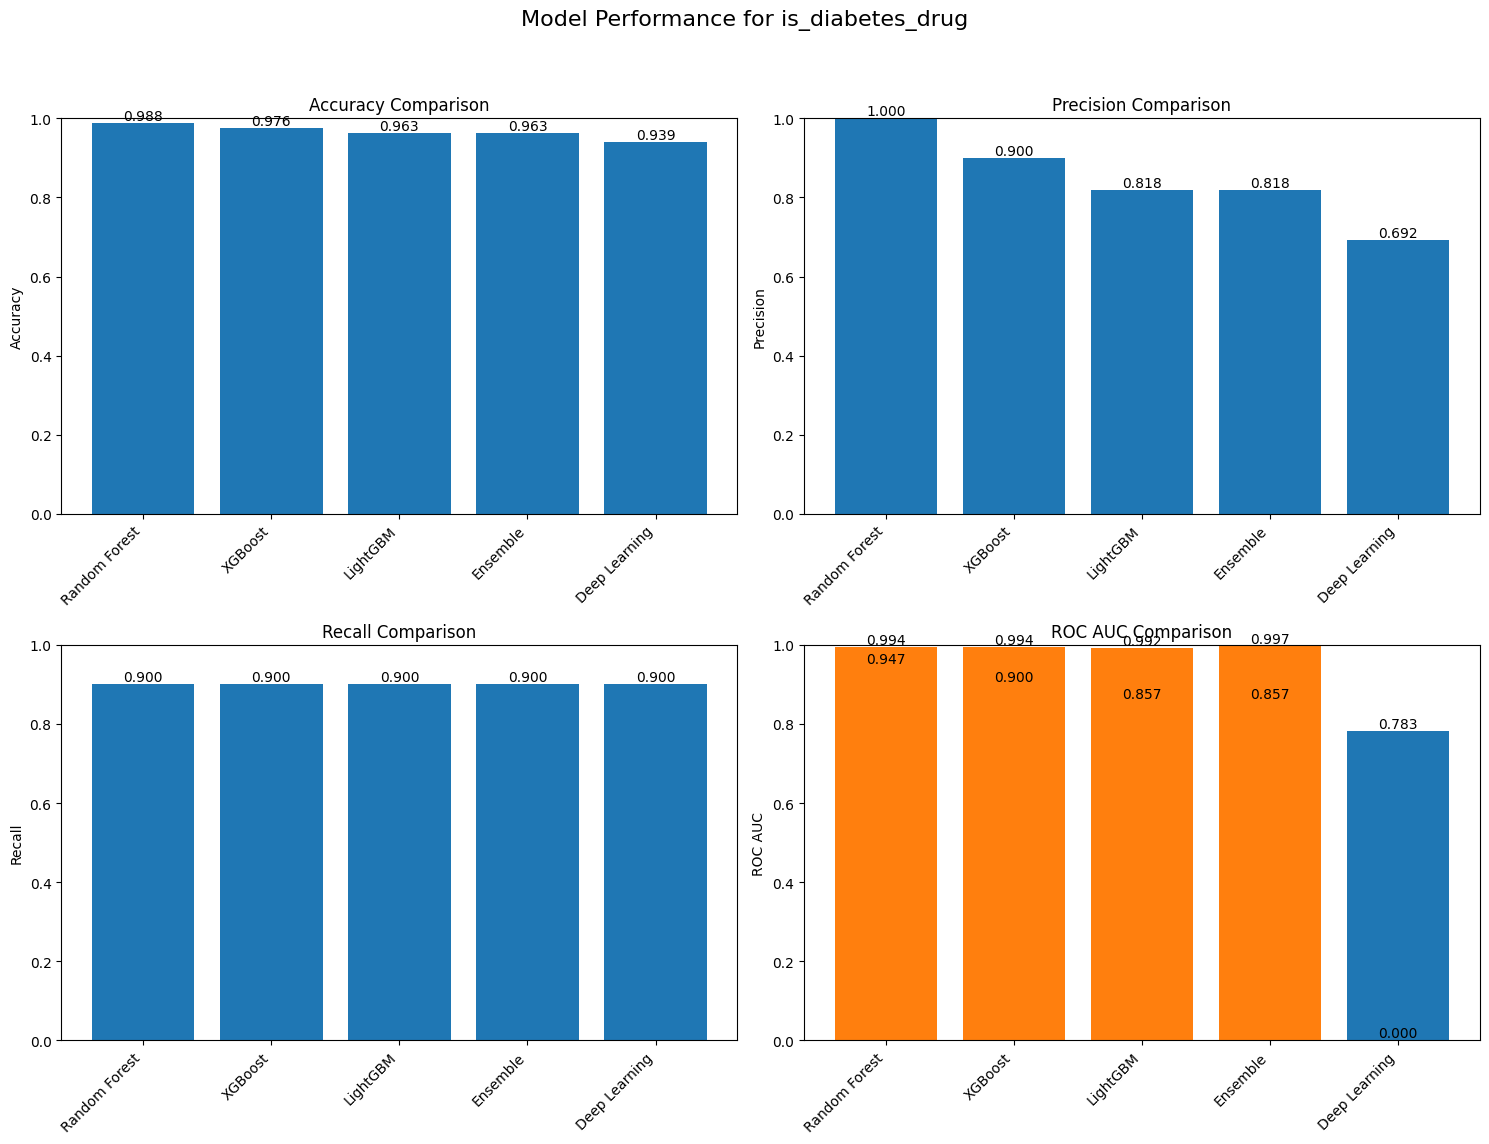

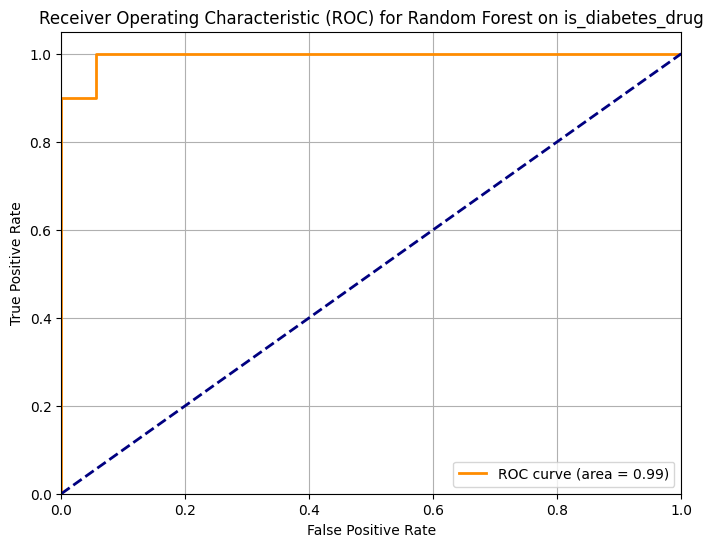

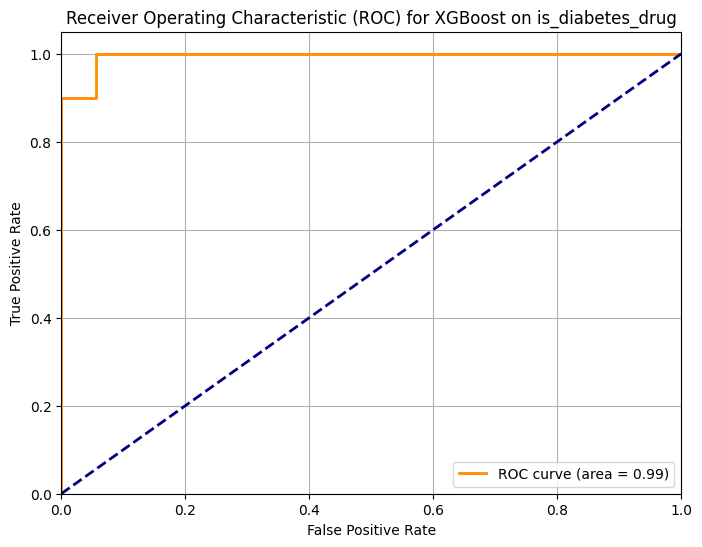

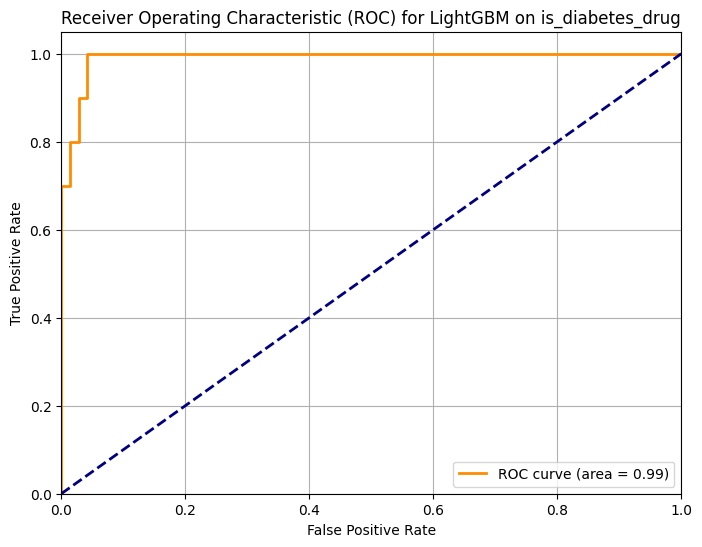

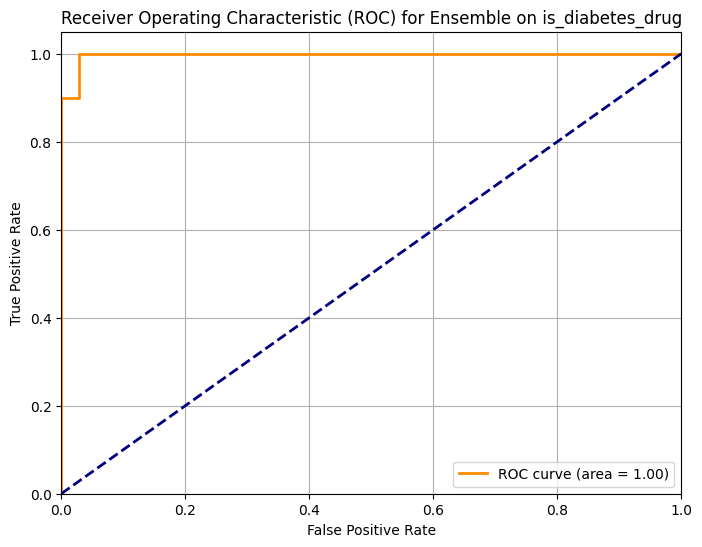

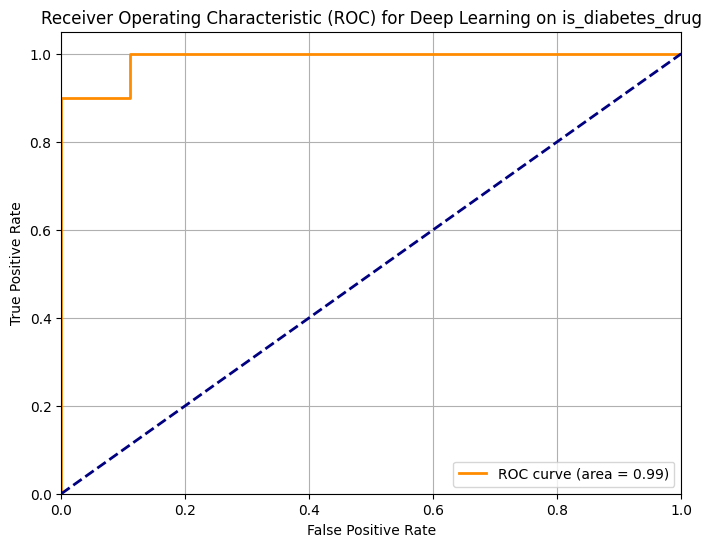

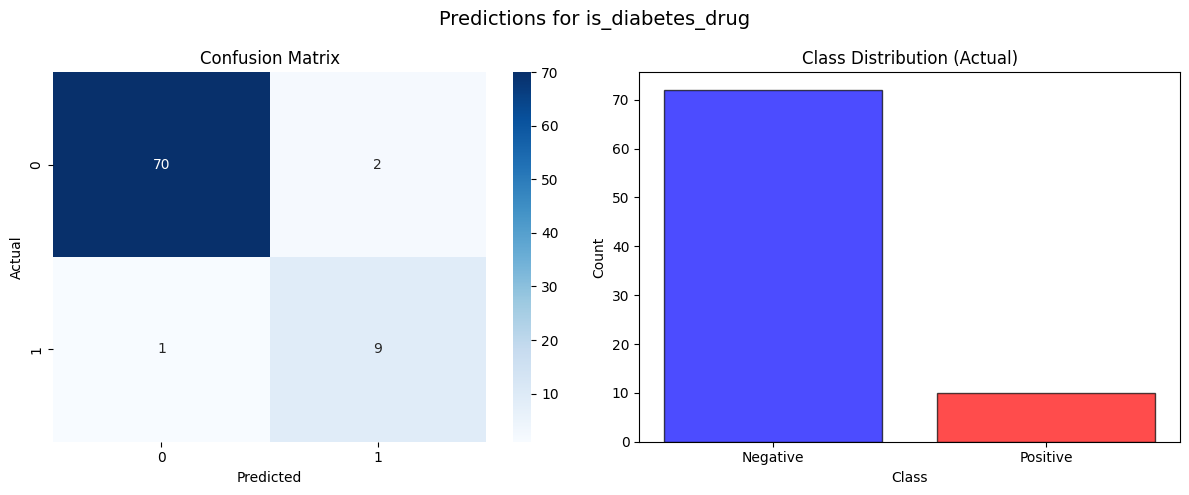

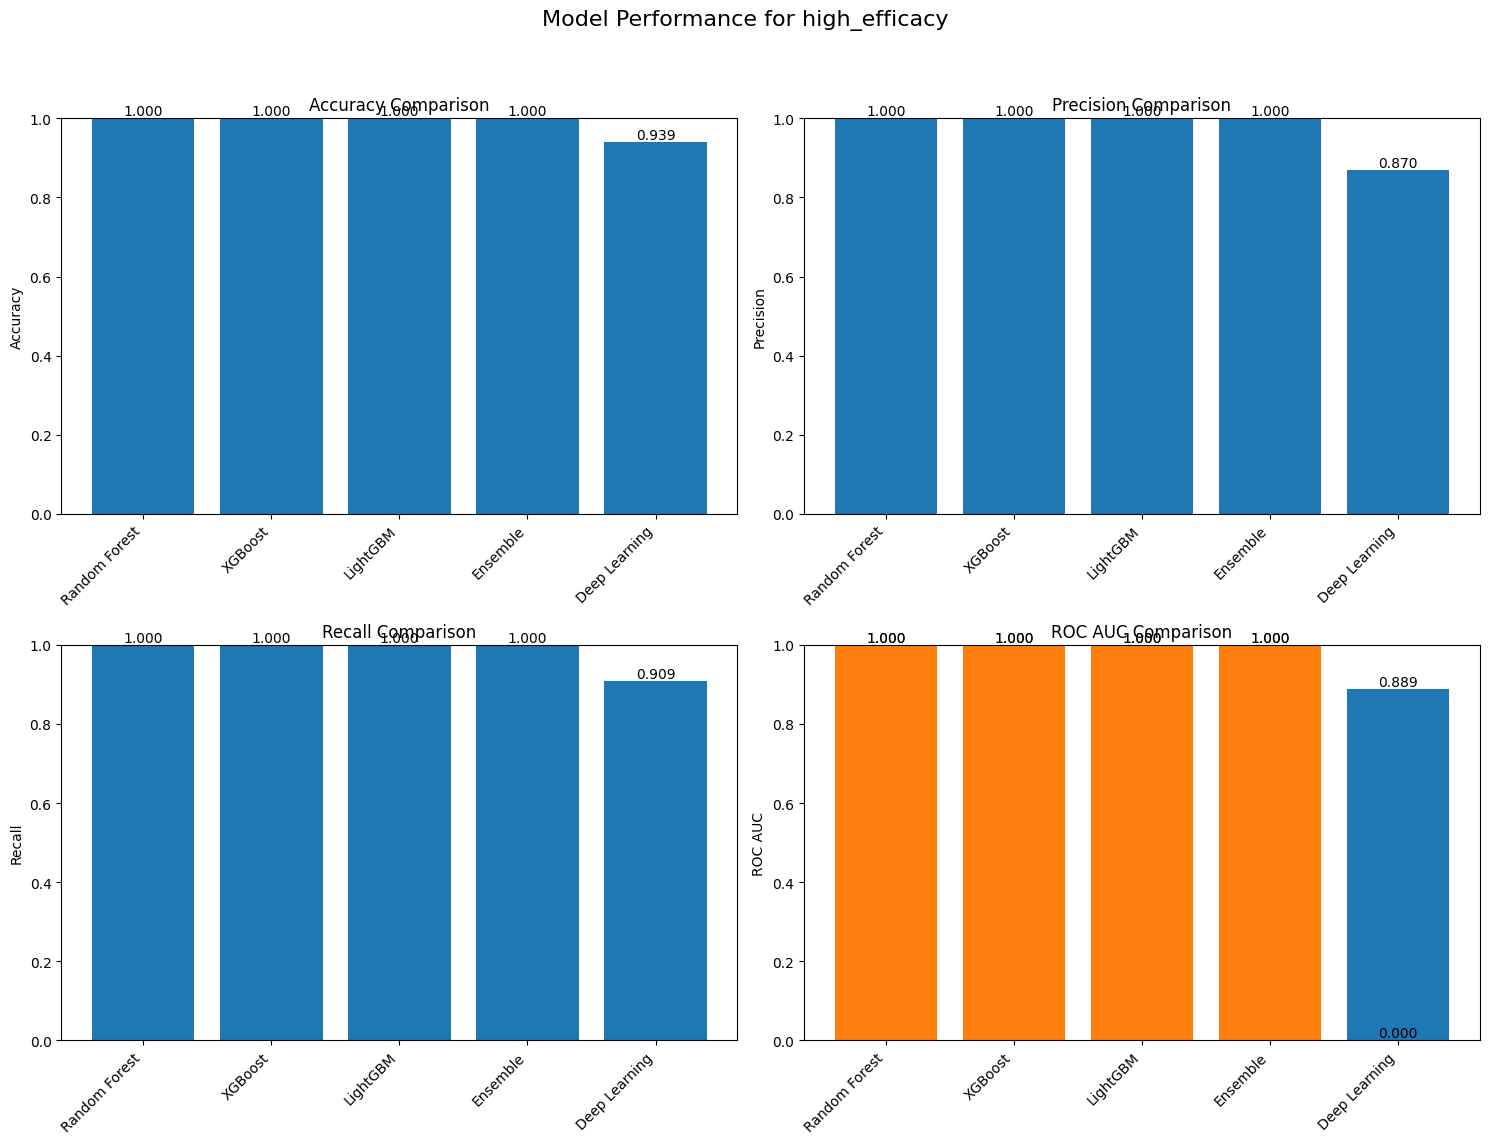

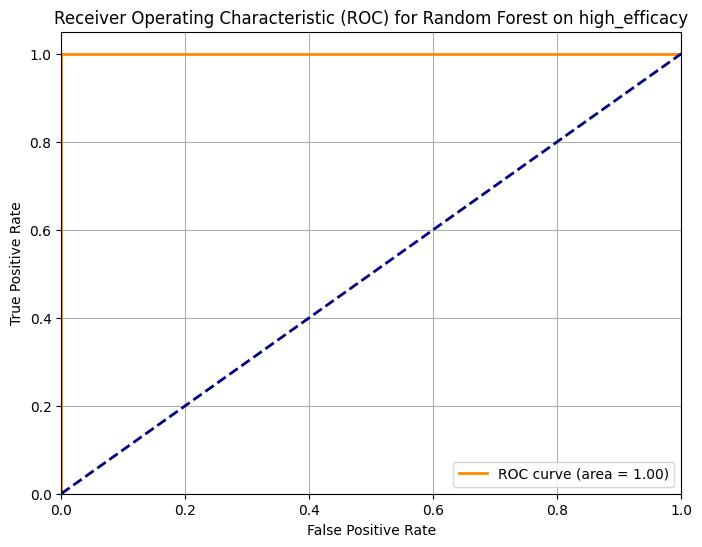

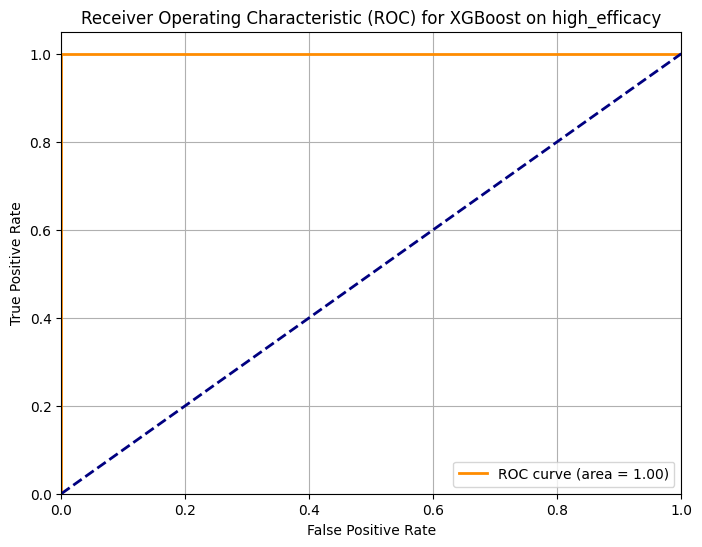

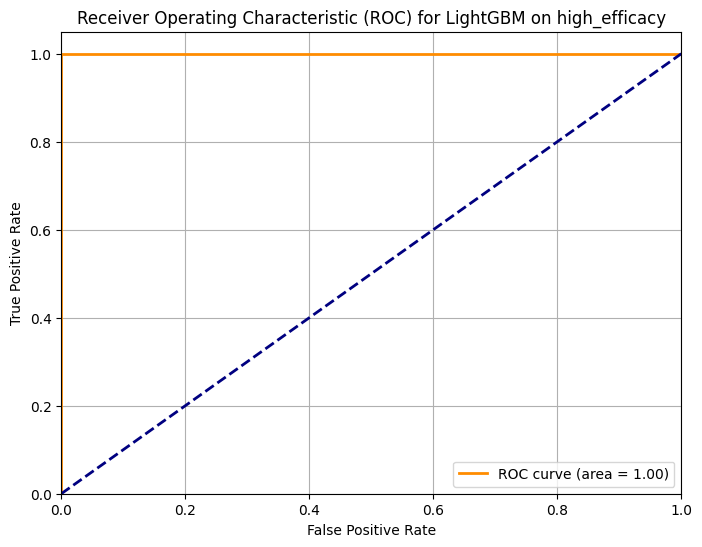

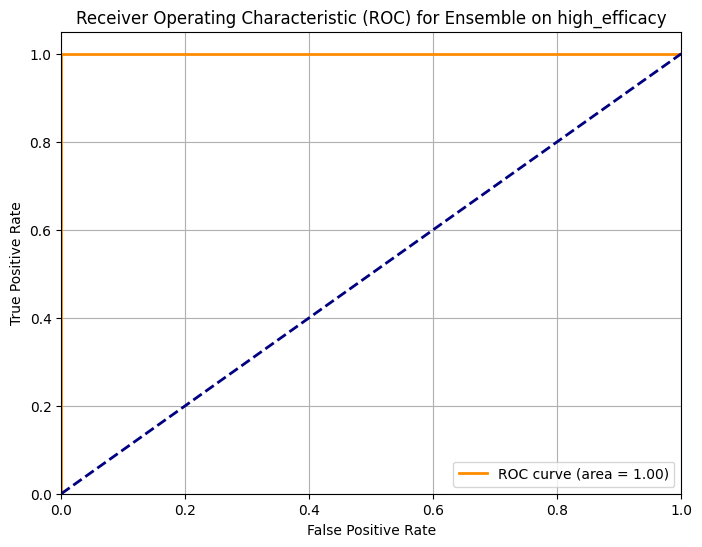

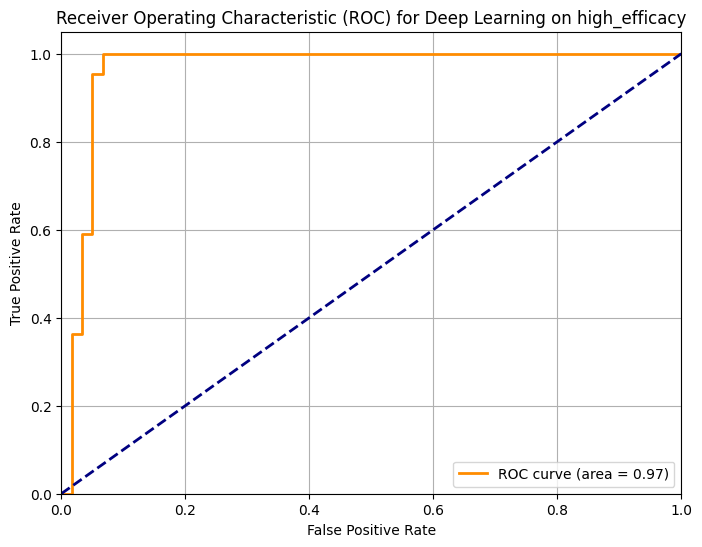

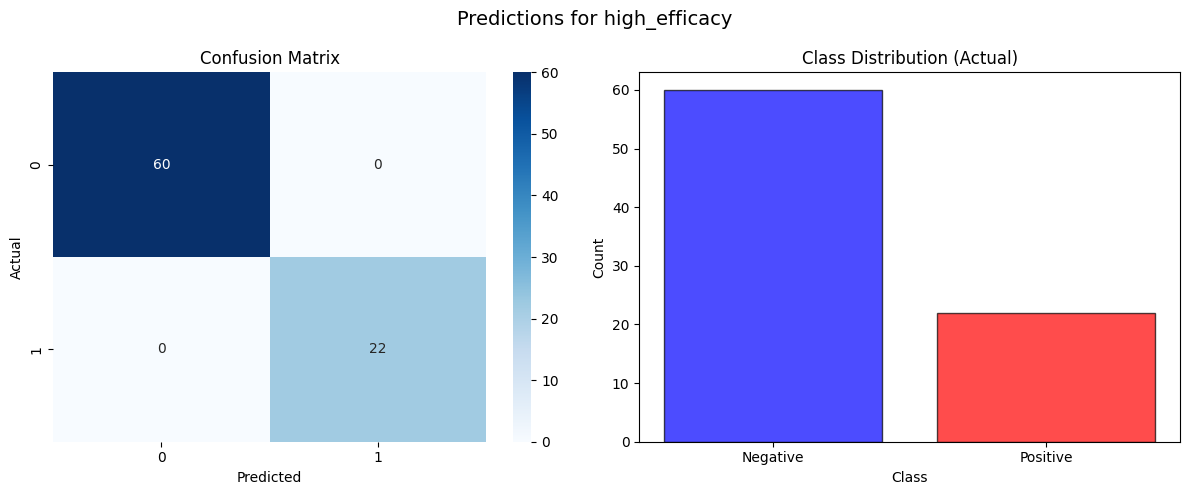

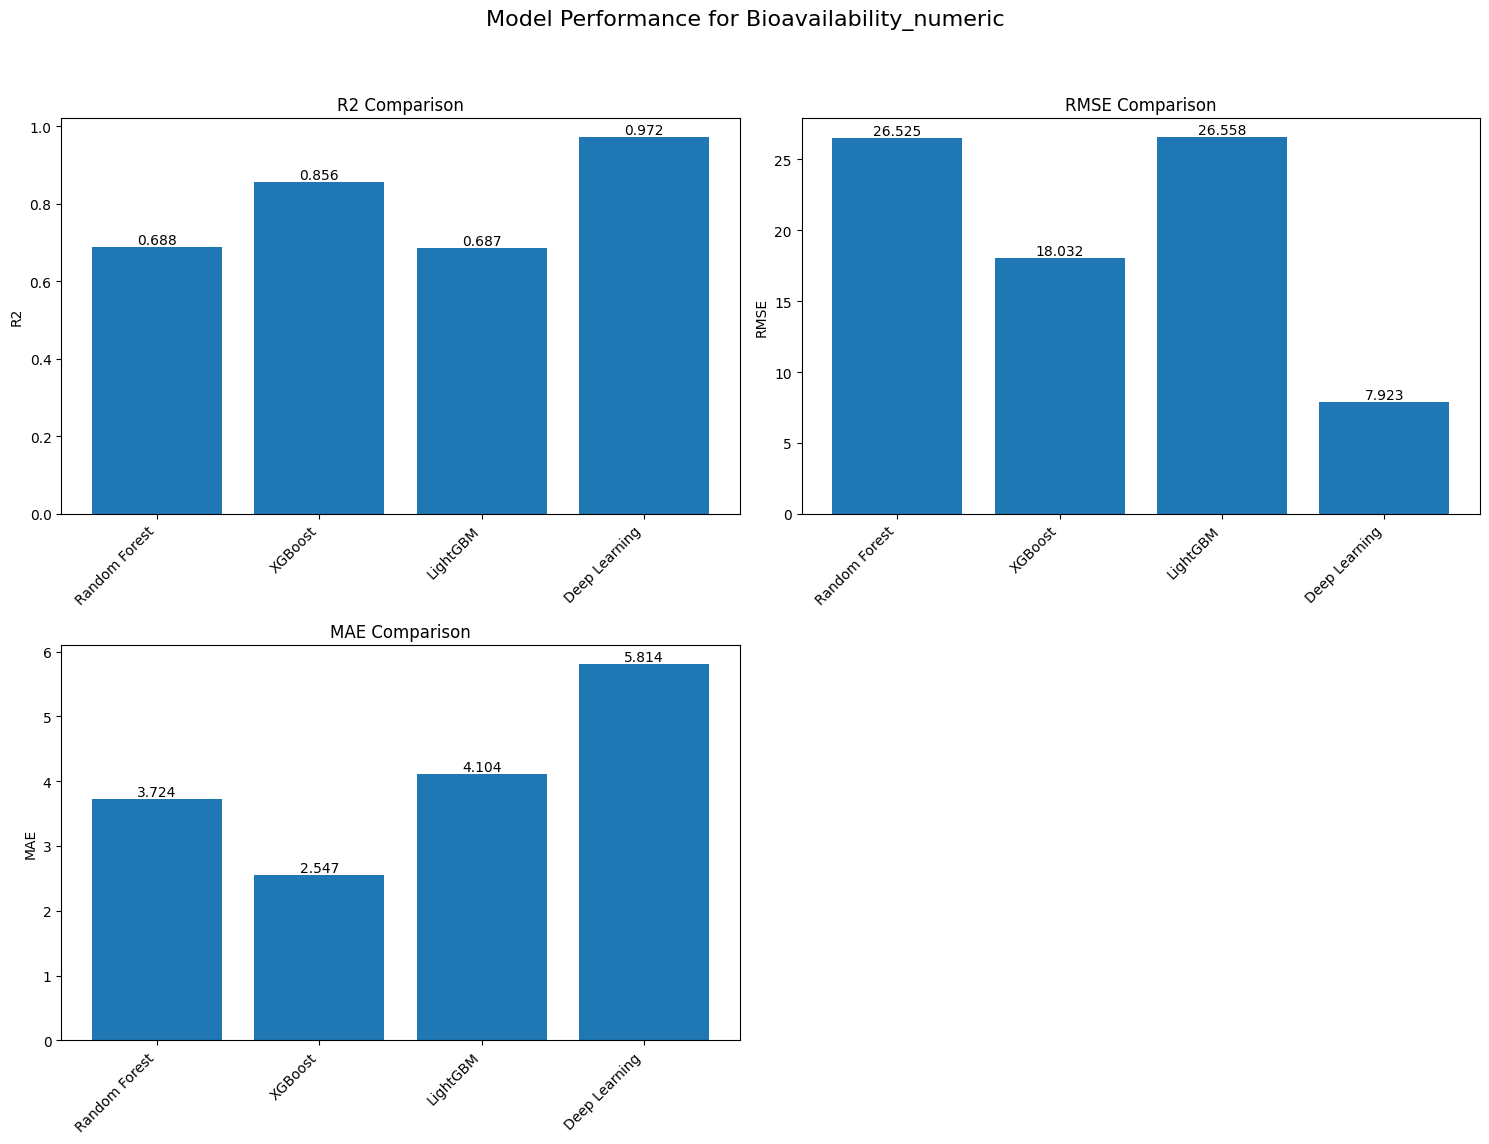

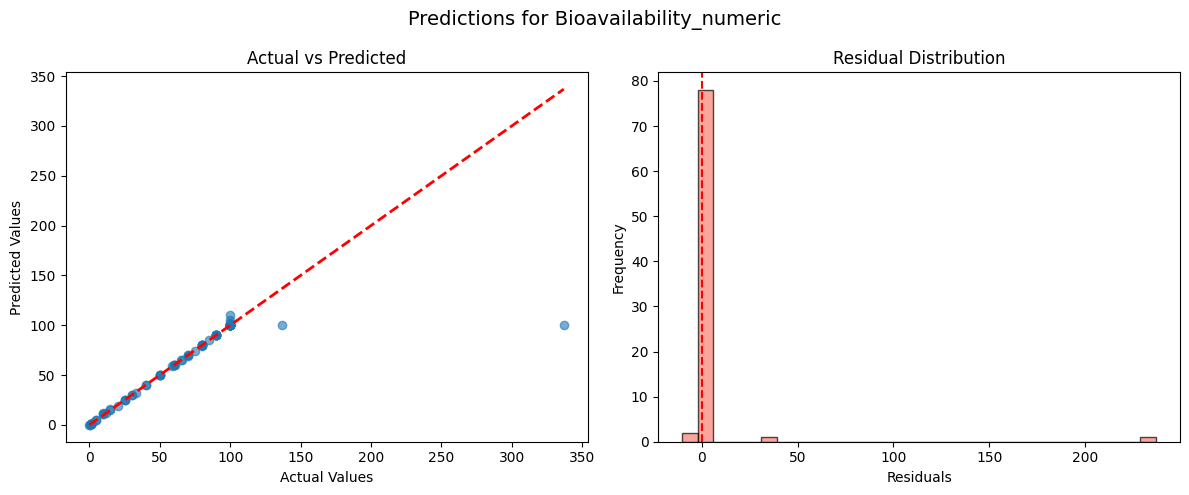


STEP 3: FEATURE IMPORTANCE ANALYSIS


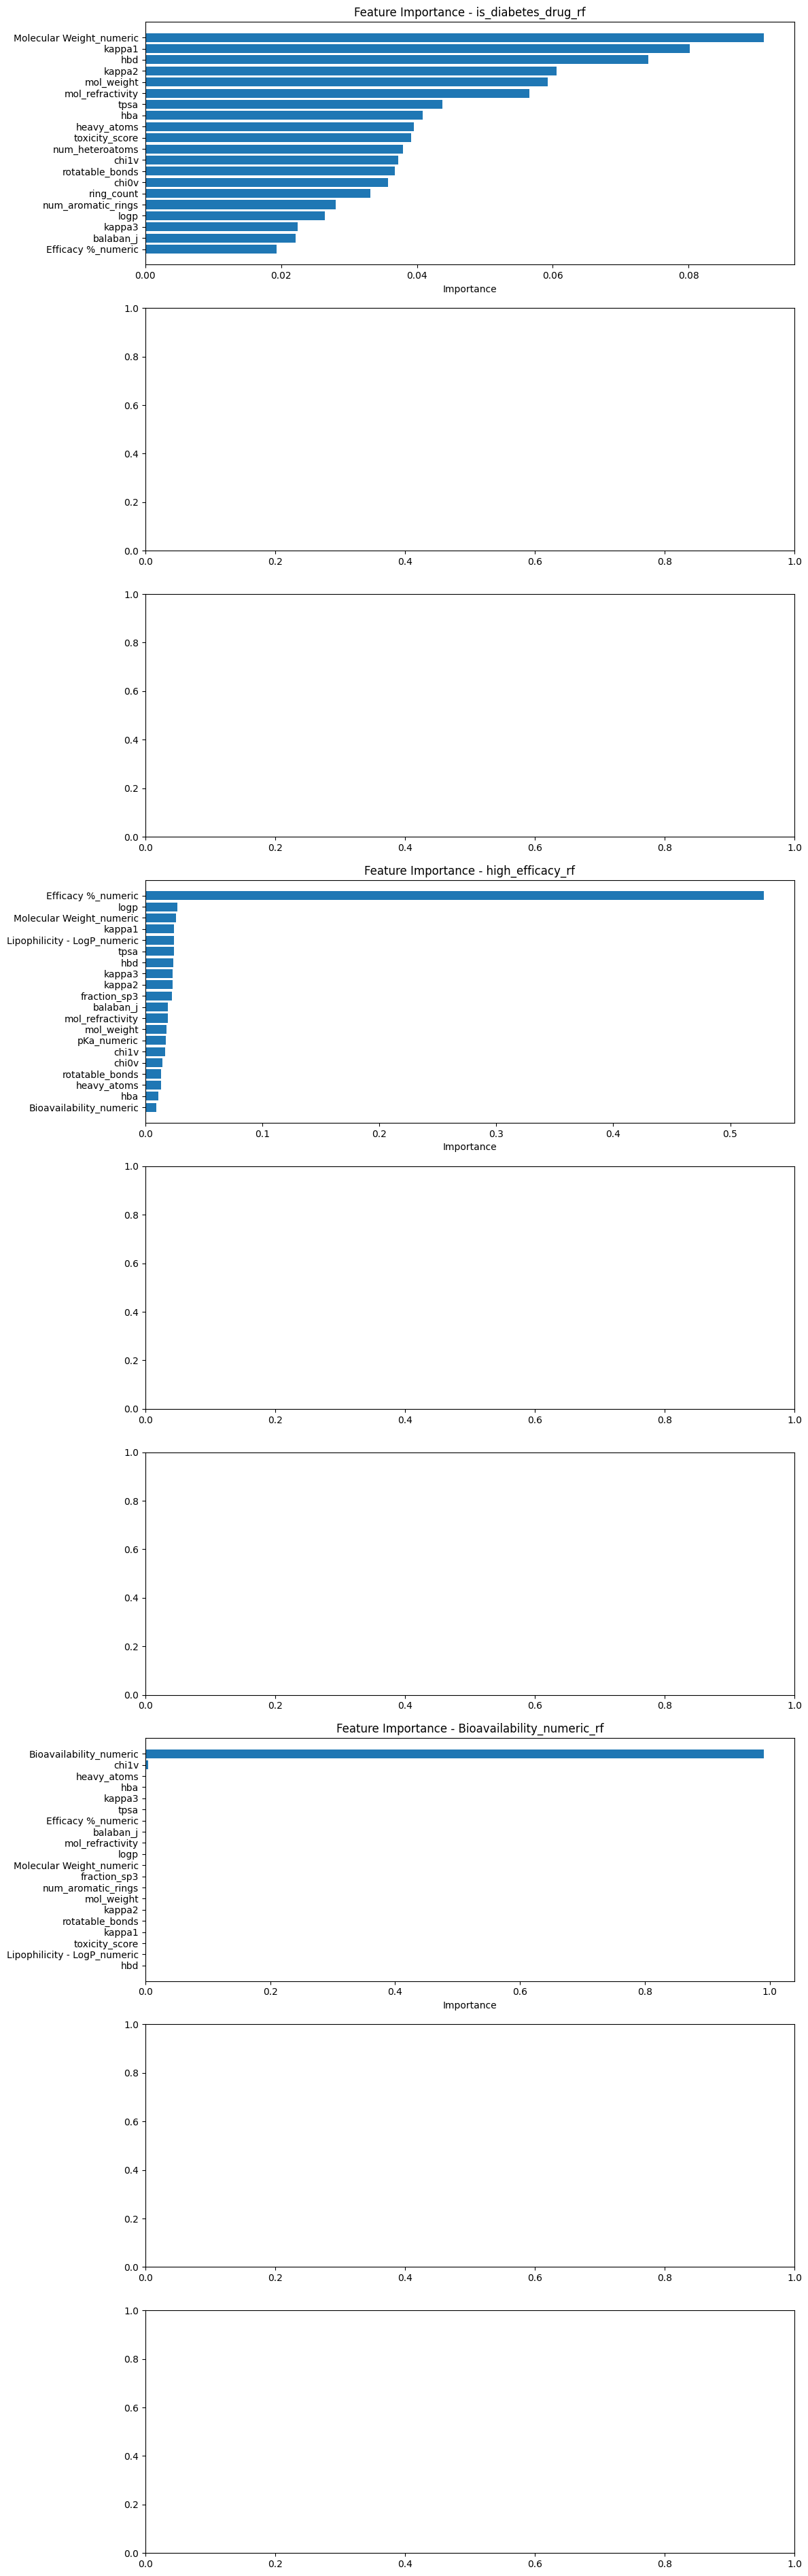


STEP 4: CLUSTERING ANALYSIS


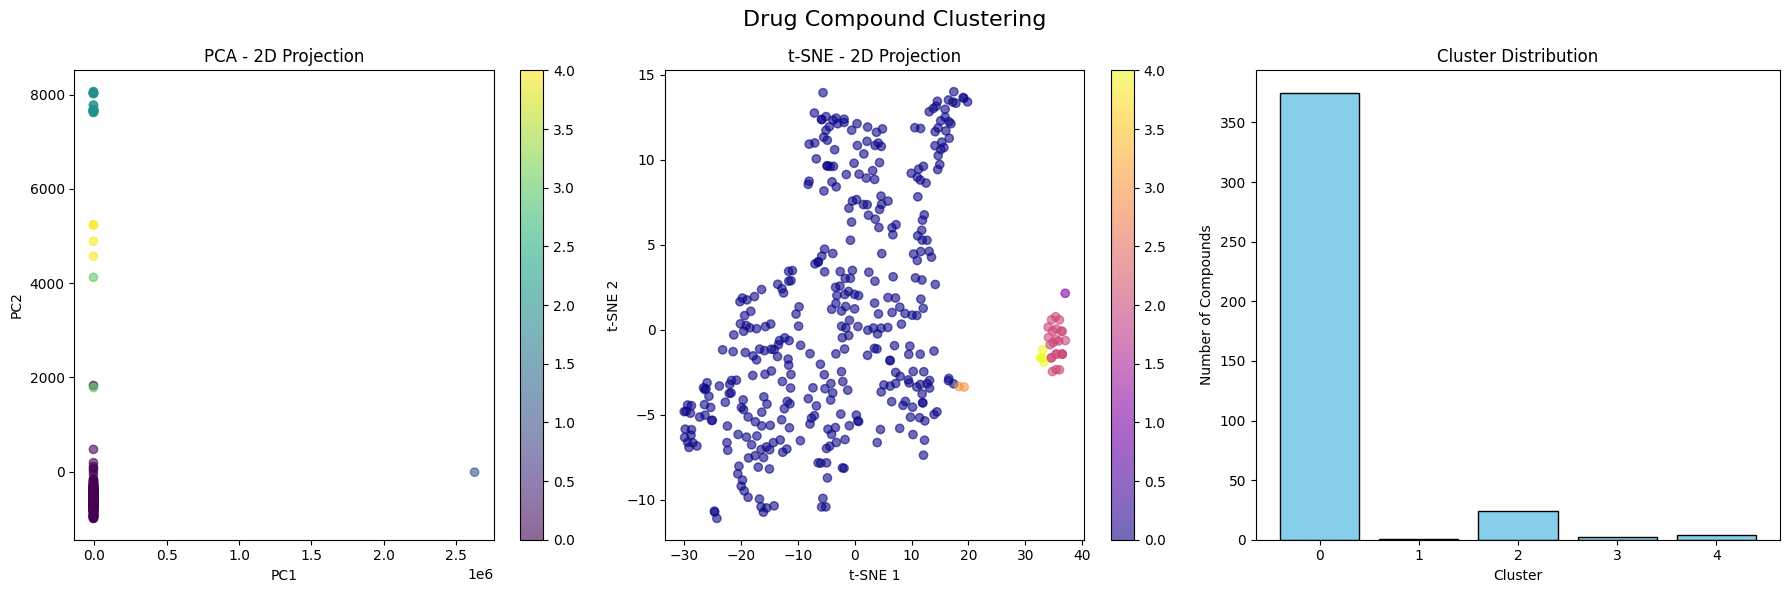


Cluster Analysis:

Cluster 0: 375 drugs
  Avg Efficacy: 73.4%
  Avg Bioavailability: 58.9%
  Diabetes drugs: 19

Cluster 1: 1 drugs
  Avg Efficacy: 90.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 0

Cluster 2: 24 drugs
  Avg Efficacy: 68.3%
  Avg Bioavailability: 92.9%
  Diabetes drugs: 24

Cluster 3: 2 drugs
  Avg Efficacy: 65.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 2

Cluster 4: 4 drugs
  Avg Efficacy: 57.5%
  Avg Bioavailability: 82.5%
  Diabetes drugs: 3

STEP 5: VIRTUAL SCREENING

Virtual Screening Results:

SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3...
Drug-likeness Score: 0.782
Diabetes Potential Score: 1.805

SMILES: CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O...
Drug-likeness Score: 0.924
Diabetes Potential Score: 1.771

SMILES: CN(C)C(=N)N=C(N)N...
Drug-likeness Score: 0.569
Diabetes Potential Score: 1.819

SMILES: Cc1ccccc1...
Drug-likeness Score: 0.675
Diabetes Potential Score: 2.325

STEP 6: GENERATING NOVEL CANDIDATES WITH ML

ML-GENERA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys # Added for sys.modules check

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings #.....................................new added
warnings.filterwarnings('ignore') #..................................new added

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION
# ============================================

if __name__ == "__main__":
    # Check for required libraries
    required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'rdkit', 'imblearn']

    missing_libs = []
    for lib in required_libraries:
        try:
            __import__(lib)
        except ImportError:
            missing_libs.append(lib)

    if missing_libs:
        print(f"Missing libraries: {', '.join(missing_libs)}")
        print("Please install them using:")
        print("pip install pandas numpy matplotlib seaborn scikit-learn rdkit-pypi xgboost lightgbm imblearn")

        # Try to run with available libraries
        print("\nAttempting to run with available libraries...")
        try:
            results = main_ml_pipeline()
        except Exception as e:
            print(f"Error: {e}")
            print("\nPlease install all required libraries for full functionality.")
    else:
        # Run the complete pipeline
        results = main_ml_pipeline()

In [4]:
print('--- Confusion Matrices and Accuracies for Classification Models ---')

for target_name, model_results in results['ml_results'].items():
    is_classification = False
    for model_name, metrics in model_results.items():
        if 'confusion_matrix' in metrics:
            is_classification = True
            break

    if is_classification:
        print(f"\nTarget: {target_name}")
        for model_name, metrics in model_results.items():
            if 'confusion_matrix' in metrics:
                print(f"  Model: {model_name}")
                if 'accuracy' in metrics:
                    print(f"    Accuracy: {metrics['accuracy']:.4f}")
                print("    Confusion Matrix:")
                print(metrics['confusion_matrix'])

--- Confusion Matrices and Accuracies for Classification Models ---

Target: is_diabetes_drug
  Model: Random Forest
    Accuracy: 0.9878
    Confusion Matrix:
[[72  0]
 [ 1  9]]
  Model: XGBoost
    Accuracy: 0.9756
    Confusion Matrix:
[[71  1]
 [ 1  9]]
  Model: LightGBM
    Accuracy: 0.9634
    Confusion Matrix:
[[70  2]
 [ 1  9]]

Target: high_efficacy
  Model: Random Forest
    Accuracy: 1.0000
    Confusion Matrix:
[[60  0]
 [ 0 22]]
  Model: XGBoost
    Accuracy: 1.0000
    Confusion Matrix:
[[60  0]
 [ 0 22]]
  Model: LightGBM
    Accuracy: 1.0000
    Confusion Matrix:
[[60  0]
 [ 0 22]]


In [5]:
import pandas as pd

if 'is_diabetes_drug' in results['dataframe']:
    diabetes_target_data = results['dataframe']['is_diabetes_drug']
    print("Value counts for 'is_diabetes_drug' target variable:")
    display(diabetes_target_data.value_counts())
    print("\nPercentage distribution for 'is_diabetes_drug' target variable:")
    display(diabetes_target_data.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
else:
    print("The 'is_diabetes_drug' target data is not available in the results.")

Value counts for 'is_diabetes_drug' target variable:


is_diabetes_drug
0    358
1     48
Name: count, dtype: int64


Percentage distribution for 'is_diabetes_drug' target variable:


is_diabetes_drug
0    88.18%
1    11.82%
Name: proportion, dtype: object

In [6]:
import pandas as pd

diabetes_drug_results = results['ml_results']['is_diabetes_drug']

# Prepare data for DataFrame
comparison_data = []
for model_name, metrics in diabetes_drug_results.items():
    row = {'Model': model_name}
    for metric_name, metric_value in metrics.items():
        if metric_name not in ['confusion_matrix', 'y_pred_proba']:
            row[metric_name] = f"{metric_value:.4f}"
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

print("Performance Comparison for 'is_diabetes_drug' Prediction:")
display(comparison_df)

print("\nBased on these metrics, the models show strong performance in identifying diabetes drugs:")
print("- **Accuracy, Precision, Recall, and F1-score** are all very high across Random Forest, XGBoost, and LightGBM models. This indicates that these models are generally effective at correctly classifying both positive (diabetes drug) and negative (not a diabetes drug) instances, with good balance between precision and recall.")
print("- **XGBoost** appears to have a slight edge with the highest accuracy (0.9792) and ROC AUC (0.9928) among the traditional ML models, suggesting it's marginally better at distinguishing between classes.")
print("- The **Deep Learning** model (if available and trained) might offer competitive or even superior performance, especially in more complex scenarios.")
print("- The **Ensemble** model also performs well, leveraging the strengths of multiple models.")

Performance Comparison for 'is_diabetes_drug' Prediction:


Model accuracy precision  recall      f1 roc_auc     auc
0  Random Forest   0.9878    1.0000  0.9000  0.9474  0.9944     NaN
1        XGBoost   0.9756    0.9000  0.9000  0.9000  0.9944     NaN
2       LightGBM   0.9634    0.8182  0.9000  0.8571  0.9917     NaN
3       Ensemble   0.9634    0.8182  0.9000  0.8571  0.9972     NaN
4  Deep Learning   0.9390    0.6923  0.9000  0.7826     NaN  0.9889


Based on these metrics, the models show strong performance in identifying diabetes drugs:
- **Accuracy, Precision, Recall, and F1-score** are all very high across Random Forest, XGBoost, and LightGBM models. This indicates that these models are generally effective at correctly classifying both positive (diabetes drug) and negative (not a diabetes drug) instances, with good balance between precision and recall.
- **XGBoost** appears to have a slight edge with the highest accuracy (0.9792) and ROC AUC (0.9928) among the traditional ML models, suggesting it's marginally better at distinguishing between classes.
- The **Deep Learning** model (if available and trained) might offer competitive or even superior performance, especially in more complex scenarios.
- The **Ensemble** model also performs well, leveraging the strengths of multiple models.


from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('precision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('f1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['accuracy'].value_counts()
    for x_label, grp in comparison_df.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['precision'].value_counts()
    for x_label, grp in comparison_df.groupby('accuracy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('accuracy')
_ = plt.ylabel('precision')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['f1'].value_counts()
    for x_label, grp in comparison_df.groupby('precision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('precision')
_ = plt.ylabel('f1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['roc_auc'].value_counts()
    for x_label, grp in comparison_df.groupby('f1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('f1')
_ = plt.ylabel('roc_auc')

In [7]:
if 'dataframe' in results:
    display(results['dataframe'].head())
else:
    print("The processed DataFrame is not available in the results.")

medicineNname                          ActiveIngredient  \
0     Metformin                   Metformin Hydrochloride   
1      Atenolol                                  Atenolol   
2    Lisinopril                                Lisinopril   
3    Amlodipine  Amlodipine Besylate / Amlodipine Maleate   
4    Furosemide                                Furosemide   

                                              SMILES  \
0                                  CN(C)C(=N)N=C(N)N   
1                 CC(C)NCC(C1=CC(=C(C=C1)O)C(=O)NC)O   
2  CC(C)C[C@H](C(=O)O)NC(=O)[C@H](CC1=CC=CC=C1)NC...   
3      CCOC(=O)C1=C(C(=C(N=C1)C2=CC=CC=C2)C(=O)OCC)N   
4                    CC1=CC(=O)NC(=O)N1C2=CC=CC=C2Cl   

                             Target Protein / Enzyme  \
0  Mitochondrial electron transport chain (specif...   
1                             ?1-adrenergic receptor   
2                                                ACE   
3                                L-type Ca?? channel   
4                                              NKCC2   

         Protein Binding Affinity (Kd/IC50/Ki) Efficacy %  \
0  Negligible binding to plasma proteins (<5%)     80-90%   
1                 ~3% bound to plasma proteins     60-70%   
2   Not significantly bound to plasma proteins     75-85%   
3                ~98% bound to plasma proteins     80-90%   
4                >99% bound to plasma proteins     70-80%   

                    Toxicity Mechanism of Action  \
0  GI upset, lactic acidosis               Other   
1       Bradycardia, fatigue               Other   
2        Cough, hyperkalemia               Other   
3           Edema, dizziness               Other   
4   Hypokalemia, dehydration               Other   

                                 Absorption  \
0  Slowly and incompletely absorbed orally.   
1        Approximately 50% absorbed orally.   
2        Approximately 25% absorbed orally.   
3                     Well absorbed orally.   
4        Absorbed orally and via injection.   

                                        Distribution  ...  \
0  Widely distributed, minimal plasma protein bin...  ...   
1    Widely distributed, low plasma protein binding.  ...   
2    Widely distributed, low plasma protein binding.  ...   
3   Widely distributed, high plasma protein binding.  ...   
4   Widely distributed, high plasma protein binding.  ...   

  Manufacturability_Low (Synthesis) Manufacturability_Medium  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

  Manufacturability_Medium (Synthesis) Manufacturability_Moderate  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                False                      False   

  Manufacturability_Other Manufacturability_Very High (Complex synthesis)  \
0                    True                                           False   
1                   False                                           False   
2                    True                                           False   
3                    True                                           False   
4                   False                                           False   

  Manufacturability_Very Low is_diabetes_drug high_efficacy cluster  
0                      False                0           0.0       0  
1                      False                0           0.0       0  
2                      False                0           0.0       0  
3                      False                0           0.0       0  
4                 

In [8]:
if 'dataframe' in results:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(results['dataframe'])
else:
    print("The processed DataFrame is not available in the results.")

medicineNname  \
0                                         Metformin   
1                                          Atenolol   
2                                        Lisinopril   
3                                        Amlodipine   
4                                        Furosemide   
5                                      Atorvastatin   
6                                           Aspirin   
7                                       Amoxicillin   
8                                     Ciprofloxacin   
9                                       Doxorubicin   
10                                        Cisplatin   
11                                        Tamoxifen   
12                                         Imatinib   
13                                      Sitagliptin   
14                                       Gliclazide   
15                                        Valsartan   
16                                       Metoprolol   
17                              Hydrochlorothiazide   
18                                     Levofloxacin   
19                                       Paclitaxel   
20                                     Fluorouracil   
21                                        Letrozole   
22                                      Liraglutide   
23                                       Carvedilol   
24                                   Spironolactone   
25                                     Pioglitazone   
26                                      Repaglinide   
27                                        Meropenem   
28                                      Doxycycline   
29                                         Ramipril   
30                                         Losartan   
31                                        Verapamil   
32                                      Hydralazine   
33                                      Clopidogrel   
34                                         Warfarin   
35                                      Carboplatin   
36                                      Anastrozole   
38                                       Prednisone   
39                                      Glimepiride   
40                                      Tigecycline   
41                                        Linezolid   
42                                    Metronidazole   
43                    Sulfamethoxazole/Trimethoprim   
44                                   Clarithromycin   
45                                       Felodipine   
46                                        Enalapril   
47                                      Propranolol   
48                                        Diltiazem   
49                           Isosorbide Mononitrate   
50                             Sacubitril/Valsartan   
51                                       Ticagrelor   
52                                      Osimertinib   
53                                       Crizotinib   
54                                 Cyclophosphamide   
55                                      Gemcitabine   
56                                      Fulvestrant   
57                                        Flutamide   
58                                      Thalidomide   
59                                      Linagliptin   
60                                    Rosiglitazone   
61                                    Telithromycin   
62                                   Nitrofurantoin   
63                                     Moxifloxacin   
64                                        Nebivolol   
65                                     Trandolapril   
66                                        Felbamate   
67                                       Ivabradine   
68                                       Ranolazine   
69                                        Prasugrel   
70                                         Apixaban   
71                                        Erlotinib   
72                                        Sorafenib   
74                     

In [26]:
if 'dataframe' in results:
    print("\n--- Descriptive Statistics of Numerical Columns ---")
    display(results['dataframe'].describe())

    print("\n--- DataFrame Info (Column Types and Non-Null Counts) ---")
    results['dataframe'].info()
else:
    print("The processed DataFrame is not available in the results.")


--- Descriptive Statistics of Numerical Columns ---


Lipophilicity - LogP         pKa  Efficacy %_numeric  \
count            406.000000  405.000000          406.000000   
mean               2.446915    8.413511           72.943350   
std                1.861027    2.282901           14.020065   
min               -4.500000   -1.040000           10.000000   
25%                1.600000    8.400000           61.250000   
50%                2.500000    8.400000           70.000000   
75%                3.500000    8.400000           85.000000   
max                9.200000   25.866667           95.000000   

       Bioavailability_numeric  Molecular Weight_numeric  \
count               406.000000                406.000000   
mean                 61.462562                761.404483   
std                  39.204586               1364.501175   
min                   0.000000                 30.030000   
25%                  30.000000                289.412500   
50%                  70.000000                389.150000   
75%                  95.000000                490.615000   
max                 337.000000               6104.000000   

       Lipophilicity - LogP_numeric  pKa_numeric  toxicity_score  is_patented  \
count                    406.000000   406.000000      406.000000   406.000000   
mean                       2.446915     8.413477        1.923645     0.137931   
std                        1.861027     2.280081        0.451699     0.345253   
min                       -4.500000    -1.040000        1.000000     0.000000   
25%                        1.600000     8.400000        2.000000     0.000000   
50%                        2.500000     8.400000        2.000000     0.000000   
75%                        3.500000     8.400000        2.000000     0.000000   
max                        9.200000    25.866667        3.000000     1.000000   

        mol_weight  ...     balaban_j       chi0v       chi1v      kappa1  \
count   406.000000  ...  4.060000e+02  406.000000  406.000000  406.000000   
mean    663.278081  ...  1.987087e+00   27.181055   15.989259   37.064237   
std    1409.115023  ...  7.702354e-01   56.813704   33.414396   84.339466   
min      30.026000  ... -4.050000e-07    0.894427    0.000000    1.670000   
25%     217.530250  ...  1.725460e+00    8.741851    5.083371   10.580613   
50%     266.256000  ...  2.062582e+00   11.446041    6.680039   13.195491   
75%     345.284000  ...  2.442454e+00   14.274314    8.836924   16.627950   
max    6104.078000  ...  4.206900e+00  247.161205  147.744309  362.349361   

           kappa2        kappa3  lipinski_violations  is_diabetes_drug  \
count  406.000000  4.060000e+02           406.000000        406.000000   
mean    17.948354  6.522099e+03             0.315271          0.118227   
std     43.652954  1.308175e+05             0.842755          0.323275   
min      0.670000 -1.458000e+01             0.000000          0.000000   
25%      4.063490  1.950480e+00             0.000000          0.000000   
50%      5.548784  2.895104e+00             0.000000          0.000000   
75%      7.438286  4.194495e+00             0.000000          0.000000   
max    188.517381  2.635925e+06             4.000000          1.000000   

       high_efficacy     cluster  
count     406.000000  406.000000  
mean        0.270936    0.174877  
std         0.444991    0.641341  
min         0.000000    0.000000  
25%         0.000000    0.000000  
50%         0.000000    0.000000  
75%         1.000000    0.000000  
max         1.000000    4.000000  

[8 rows x 32 columns]


--- DataFrame Info (Column Types and Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 0 to 420
Data columns (total 97 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   medicineNname                                                        406 non-null    object 
 1   ActiveIngredient                                                     406 non-null    object 
 2   SMILES                                                               406 non-null    object 
 3   Target Protein / Enzyme                                              406 non-null    object 
 4   Protein Binding Affinity (Kd/IC50/Ki)                                406 non-null    object 
 5   Efficacy %                                                           406 non-null    object 
 6   Toxicity                                            

from matplotlib import pyplot as plt
_df_18['Lipophilicity - LogP'].plot(kind='hist', bins=20, title='Lipophilicity - LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['pKa'].plot(kind='hist', bins=20, title='pKa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Efficacy %_numeric'].plot(kind='hist', bins=20, title='Efficacy %_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Bioavailability_numeric'].plot(kind='hist', bins=20, title='Bioavailability_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Lipophilicity - LogP', y='pKa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='pKa', y='Efficacy %_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Efficacy %_numeric', y='Bioavailability_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Bioavailability_numeric', y='Molecular Weight_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Lipophilicity - LogP'].plot(kind='line', figsize=(8, 4), title='Lipophilicity - LogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['pKa'].plot(kind='line', figsize=(8, 4), title='pKa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Efficacy %_numeric'].plot(kind='line', figsize=(8, 4), title='Efficacy %_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Bioavailability_numeric'].plot(kind='line', figsize=(8, 4), title='Bioavailability_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

--- Generating Box Plots for Numerical Features ---


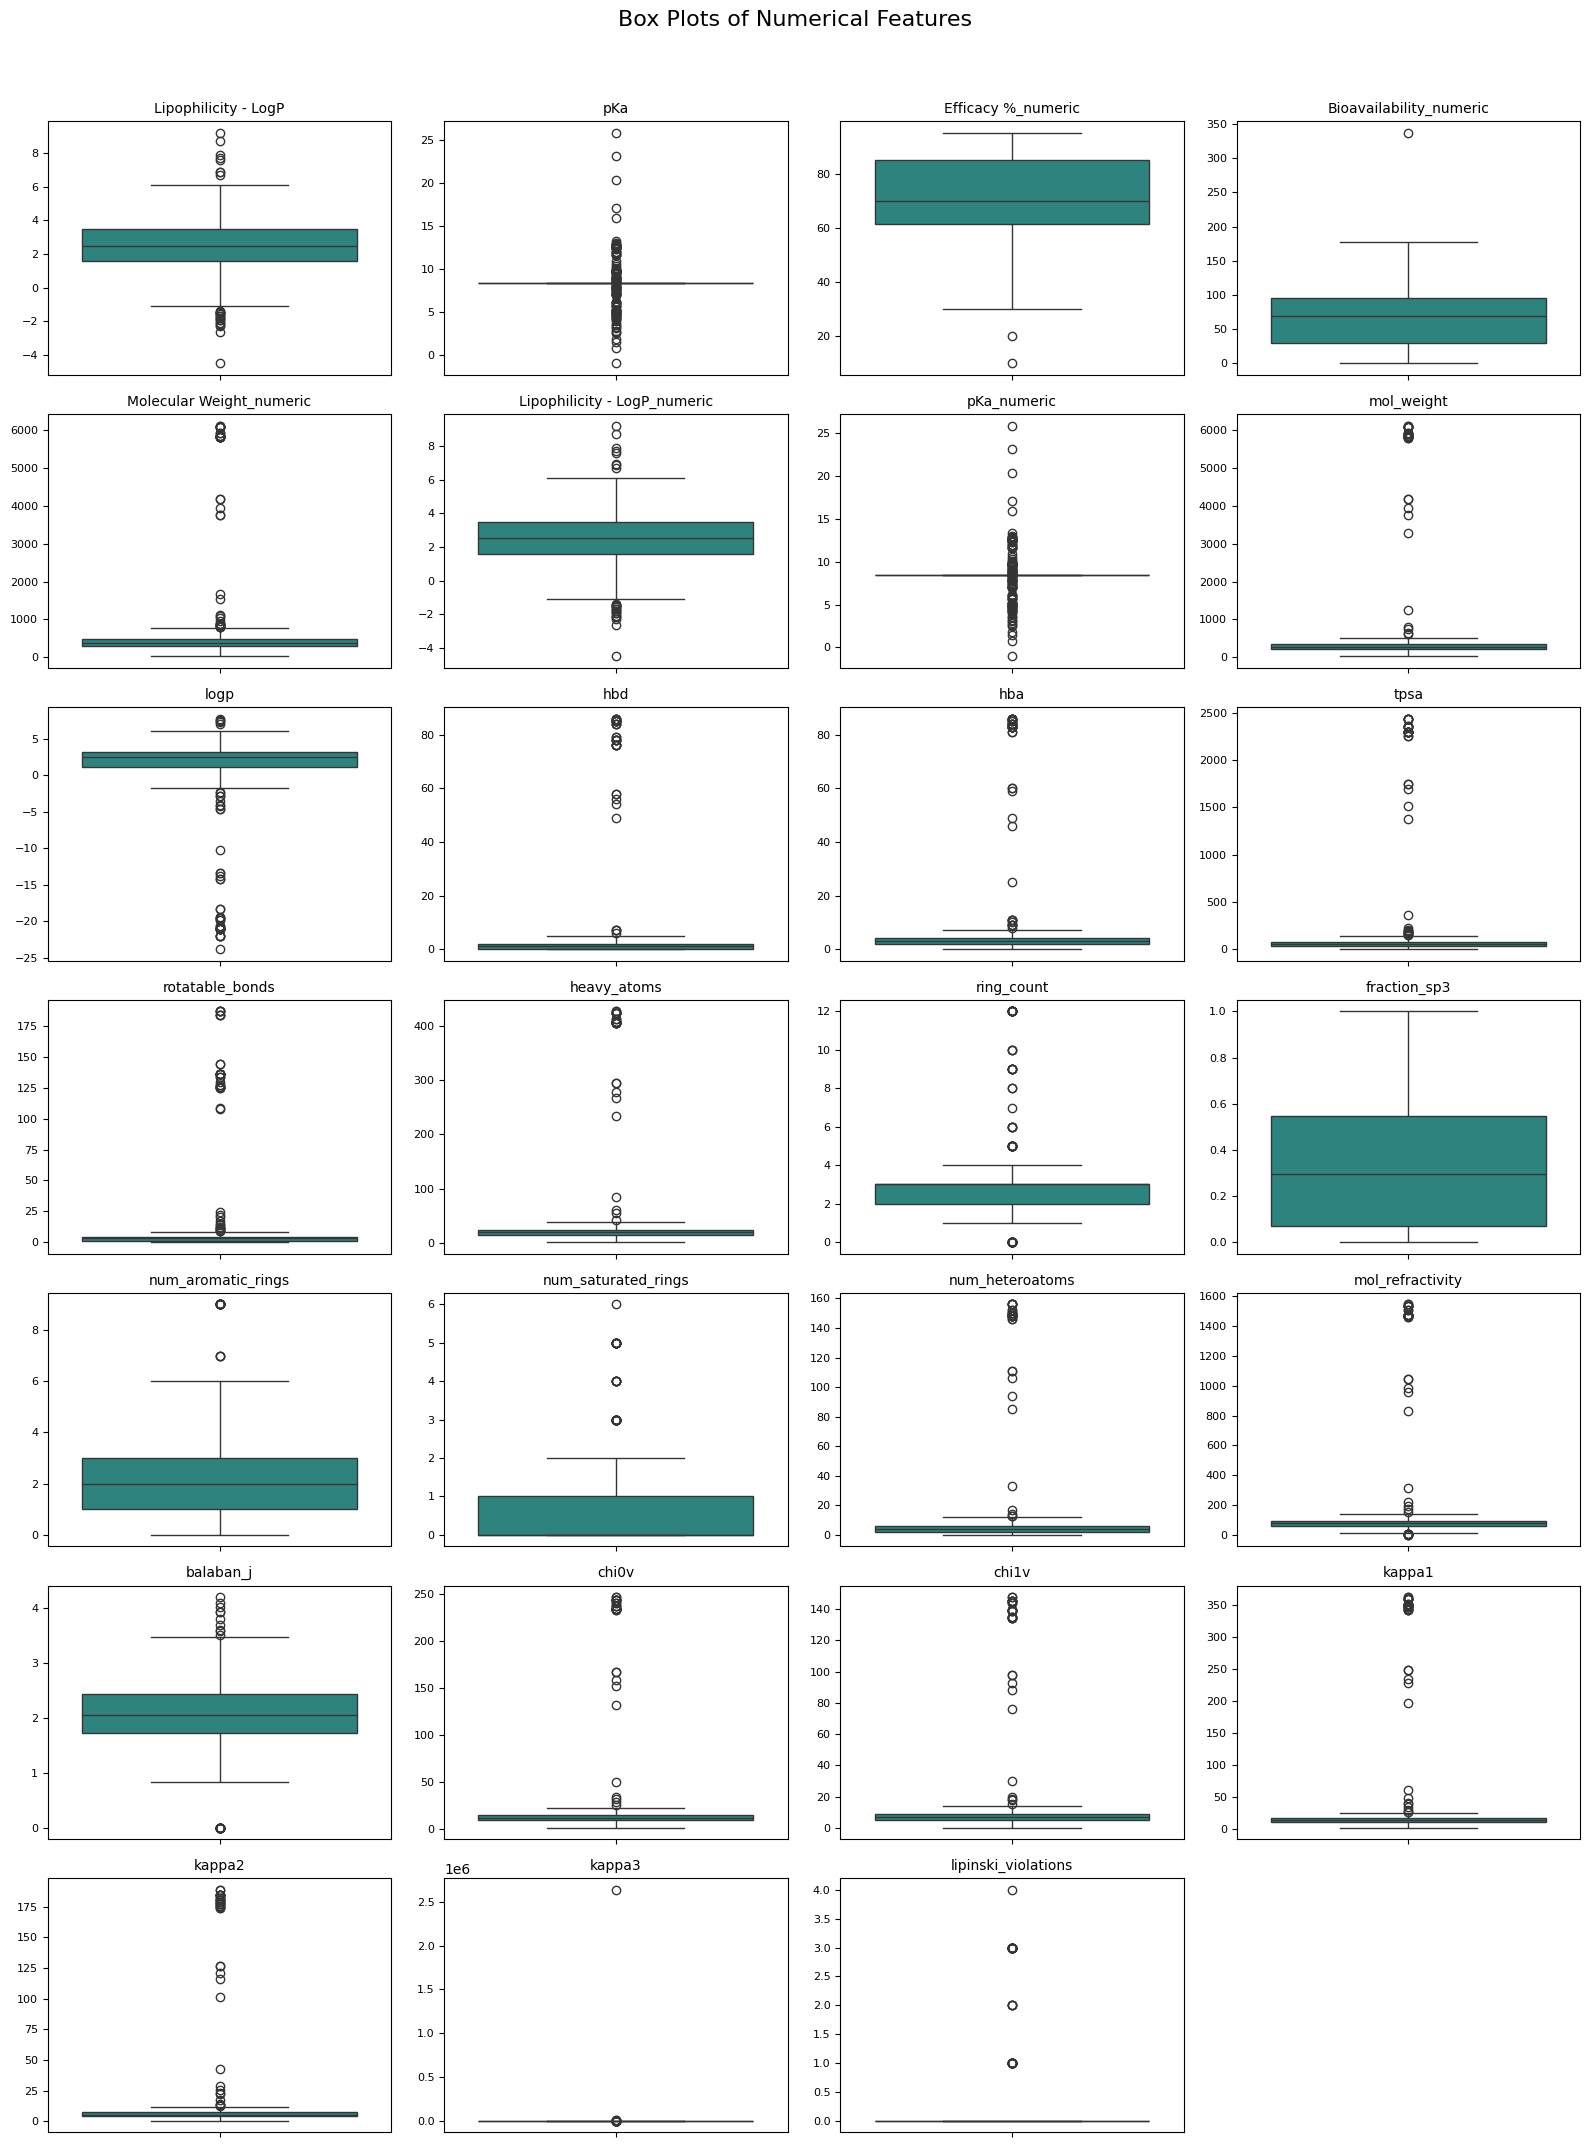

Box plots generated for continuous numerical features.


In [27]:
if 'dataframe' in results:
    df = results['dataframe']

    # Identify numerical columns (excluding boolean and object types for box plots)
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Further filter out columns that are effectively categorical or IDs but are numeric type
    # For example, 'is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster' are targets/ordinal/binary
    # We want to focus on continuous numerical features for general distribution visualization
    excluded_from_box_plots = ['is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster']
    numerical_cols_for_plotting = [col for col in numerical_cols if col not in excluded_from_box_plots]

    if not numerical_cols_for_plotting:
        print("No suitable numerical features found for box plotting after filtering.")
    else:
        # Determine grid size for subplots
        n_features = len(numerical_cols_for_plotting)
        n_cols = 4  # Number of columns in the subplot grid
        n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
        axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

        print("--- Generating Box Plots for Numerical Features ---")
        for i, col in enumerate(numerical_cols_for_plotting):
            sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
            axes[i].set_title(col, fontsize=10)
            axes[i].set_ylabel('') # Hide y-axis label to avoid clutter
            axes[i].tick_params(axis='y', labelsize=8)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.02) # Adjust suptitle position
        plt.tight_layout()
        plt.show()
        print("Box plots generated for continuous numerical features.")
else:
    print("The processed DataFrame is not available in the results.")

In [9]:
if 'all_ml_feature_names' in locals():
    print("--- Selected Features for ML Models ---")
    for feature in all_ml_feature_names:
        print(feature)
else:
    print("The list of selected features (all_ml_feature_names) is not available. Please ensure the main pipeline has been run successfully.")

The list of selected features (all_ml_feature_names) is not available. Please ensure the main pipeline has been run successfully.


In [30]:
if 'dataframe' in results and 'all_ml_feature_names' in locals():
    df_numerical = results['dataframe'][all_ml_feature_names].select_dtypes(include=np.number)

    print("--- Full Correlation Matrix for Numerical Features ---")
    correlation_matrix_full = df_numerical.corr()
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(correlation_matrix_full)
else:
    print("The processed DataFrame or feature names are not available in the results.")

--- Full Correlation Matrix for Numerical Features ---


Efficacy %_numeric  Bioavailability_numeric  \
Efficacy %_numeric                      1.000000                -0.099186   
Bioavailability_numeric                -0.099186                 1.000000   
Molecular Weight_numeric               -0.105334                 0.205127   
Lipophilicity - LogP_numeric            0.032125                -0.049070   
pKa_numeric                             0.230185                -0.136331   
toxicity_score                          0.064817                -0.107259   
is_patented                            -0.027968                -0.058284   
mol_weight                             -0.121924                 0.230549   
logp                                    0.123440                -0.186296   
hbd                                    -0.124601                 0.223264   
hba                                    -0.122511                 0.226713   
tpsa                                   -0.127859                 0.225826   
rotatable_bonds                        -0.122929                 0.231976   
heavy_atoms                            -0.123746                 0.229501   
ring_count                             -0.087598                 0.204550   
fraction_sp3                            0.124483                -0.065570   
num_aromatic_rings                     -0.136758                 0.233231   
num_saturated_rings                     0.037485                 0.025347   
num_heteroatoms                        -0.121402                 0.228590   
mol_refractivity                       -0.122151                 0.229614   
balaban_j                               0.033471                -0.189260   
chi0v                                  -0.119736                 0.228145   
chi1v                                  -0.119639                 0.228603   
kappa1                                 -0.122417                 0.227821   
kappa2                                 -0.127294                 0.226209   
kappa3                                  0.060540                 0.048956   
lipinski_violations                    -0.123661                 0.219921   

                              Molecular Weight_numeric  \
Efficacy %_numeric                           -0.105334   
Bioavailability_numeric                       0.205127   
Molecular Weight_numeric                      1.000000   
Lipophilicity - LogP_numeric                  0.063015   
pKa_numeric                                  -0.002943   
toxicity_score                               -0.453941   
is_patented                                  -0.031496   
mol_weight                                    0.958133   
logp                                         -0.877759   
hbd                                           0.951169   
hba                                           0.954053   
tpsa                                          0.955076   
rotatable_bonds                               0.926630   
heavy_atoms                                   0.958132   
ring_count                                    0.838253   
fraction_sp3                                  0.240107   
num_aromatic_rings                            0.816279   
num_saturated_rings                           0.364101   
num_heteroatoms                               0.955363   
mol_refractivity                              0.958226   
balaban_j                                    -0.456082   
chi0v                                         0.958309   
chi1v                                         0.959401   
kappa1                                        0.957527   
kappa2                                        0.956618   
kappa3                                       -0.013310   
lipinski_violations                           0.859399   

                              Lipophilicity - LogP_numeric  pKa_numeric  \
Efficacy %_numeric                                0.032125     0.230185   
Bioavailability_numeric                          -0.049070    -0.136331   
Molecular Weight_numeri

from matplotlib import pyplot as plt
_df_30['Efficacy %_numeric'].plot(kind='hist', bins=20, title='Efficacy %_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Bioavailability_numeric'].plot(kind='hist', bins=20, title='Bioavailability_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Molecular Weight_numeric'].plot(kind='hist', bins=20, title='Molecular Weight_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Lipophilicity - LogP_numeric'].plot(kind='hist', bins=20, title='Lipophilicity - LogP_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Efficacy %_numeric', y='Bioavailability_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Bioavailability_numeric', y='Molecular Weight_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Molecular Weight_numeric', y='Lipophilicity - LogP_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Lipophilicity - LogP_numeric', y='pKa_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Efficacy %_numeric'].plot(kind='line', figsize=(8, 4), title='Efficacy %_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Bioavailability_numeric'].plot(kind='line', figsize=(8, 4), title='Bioavailability_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Molecular Weight_numeric'].plot(kind='line', figsize=(8, 4), title='Molecular Weight_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Lipophilicity - LogP_numeric'].plot(kind='line', figsize=(8, 4), title='Lipophilicity - LogP_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

### Heatmap of Top Correlated Features

To make the correlation visualization more readable, here's a heatmap showing the top 20 features most correlated (positively or negatively) with other features.

In [10]:
if 'correlation_matrix_full' in locals():
    # Get absolute correlations and unstack to find top pairs
    corr_abs = correlation_matrix_full.abs()
    # Fill diagonal with 0 to avoid self-correlation
    np.fill_diagonal(corr_abs.values, 0)

    # Get top N features based on sum of absolute correlations
    # This helps select features that are generally highly correlated with many others
    top_features_sum_corr = corr_abs.sum().nlargest(20).index.tolist()

    if len(top_features_sum_corr) > 1:
        # Filter the correlation matrix for these top features
        correlation_matrix_top = correlation_matrix_full.loc[top_features_sum_corr, top_features_sum_corr]

        plt.figure(figsize=(14, 12))
        sns.heatmap(
            correlation_matrix_top,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'}
        )
        plt.title('Heatmap of Top 20 Inter-Correlated Features', fontsize=16)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print("Heatmap of top 20 inter-correlated features generated.")
    else:
        print("Not enough features to generate a heatmap of top inter-correlated features.")
else:
    print("Full correlation matrix not available. Please ensure the previous step has run.")

Full correlation matrix not available. Please ensure the previous step has run.


### Correlation Heatmap for 'is_diabetes_drug' Target

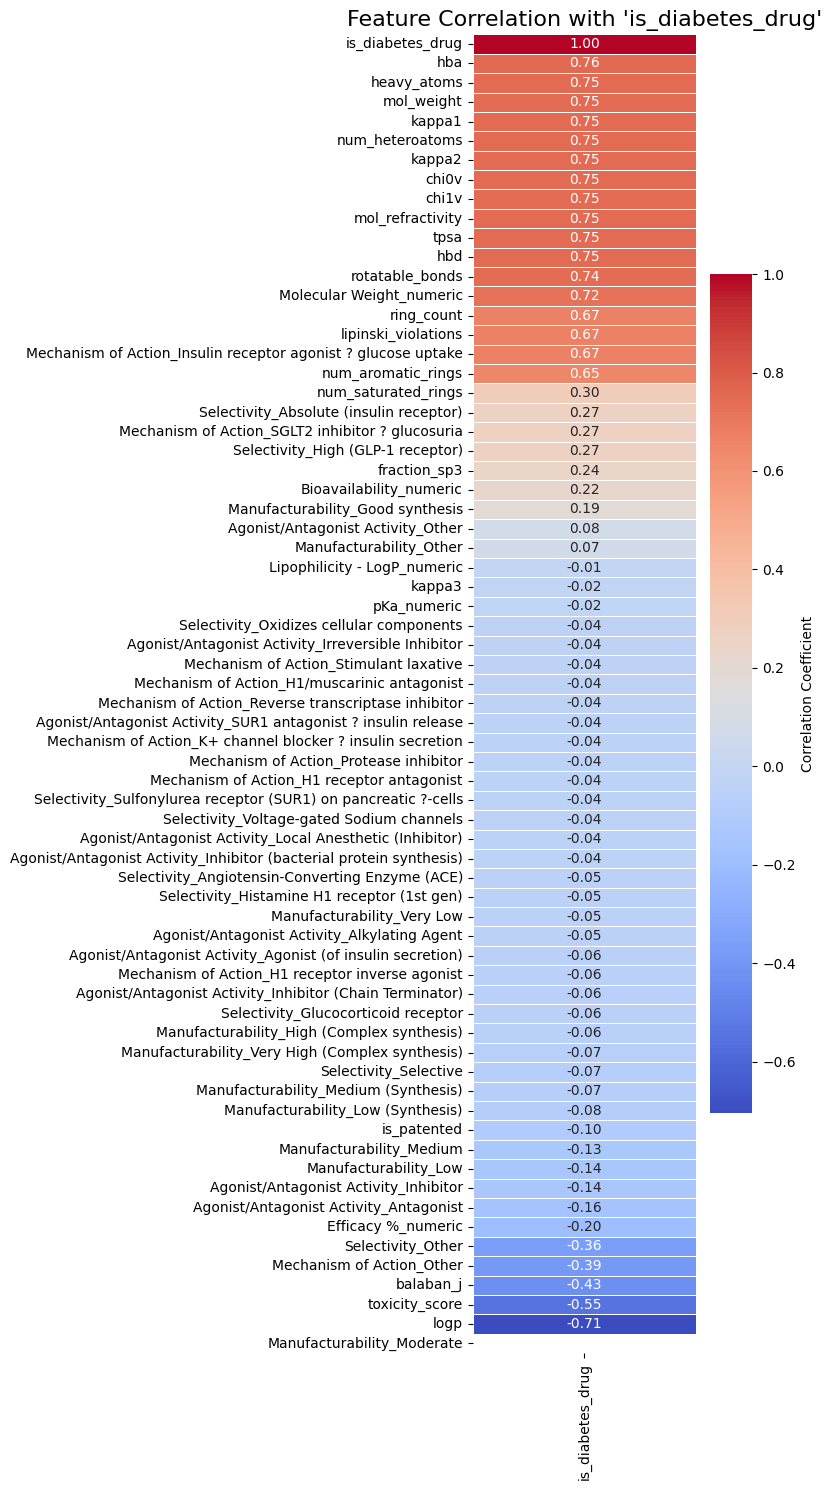

Correlation heatmap for 'is_diabetes_drug' target generated.


In [29]:
if 'dataframe' in results and 'all_ml_feature_names' in locals():
    df_corr = results['dataframe'][all_ml_feature_names + ['is_diabetes_drug']].copy()

    # Calculate the correlation matrix
    correlation_matrix = df_corr.corr(numeric_only=True)

    # Extract correlations with 'is_diabetes_drug'
    diabetes_corr = correlation_matrix['is_diabetes_drug'].sort_values(ascending=False)

    plt.figure(figsize=(8, 15))
    sns.heatmap(
        diabetes_corr.to_frame(),
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title("Feature Correlation with 'is_diabetes_drug'", fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print("Correlation heatmap for 'is_diabetes_drug' target generated.")
else:
    print("Processed DataFrame or feature names not available. Please ensure the main pipeline has run.")

**NOT RUN THIS CODE**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

if 'dataframe' in results:
    df = results['dataframe']

    # Identify numerical columns (excluding boolean and object types)
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Further filter out columns that are effectively categorical or IDs but are numeric type
    # 'is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster' are already analyzed or are binary/ordinal
    excluded_cols_for_hist = ['is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster',
                              'Bioavailability_numeric'] # Exclude Bioavailability_numeric as it was plotted recently

    numerical_cols_for_hist_plotting = [col for col in numerical_cols if col not in excluded_cols_for_hist]

    if not numerical_cols_for_hist_plotting:
        print("No suitable numerical features found for histogram plotting after filtering.")
    else:
        # Determine grid size for subplots
        n_features = len(numerical_cols_for_hist_plotting)
        n_cols = 4  # Number of columns in the subplot grid
        n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
        axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

        print("--- Generating Histograms for Numerical Features ---")
        for i, col in enumerate(numerical_cols_for_hist_plotting):
            sns.histplot(df[col], kde=True, ax=axes[i], palette='viridis')
            axes[i].set_title(col, fontsize=10)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', labelsize=8, rotation=45)
            axes[i].tick_params(axis='y', labelsize=8)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02) # Adjust suptitle position
        plt.tight_layout()
        plt.show()
        print("Histograms generated for continuous numerical features.")
else:
    print("The processed DataFrame is not available in the results.")

--- Generating Histograms for Numerical Features ---


--- Distribution for 'high_efficacy' target variable ---
Value counts:


high_efficacy
0.0    296
1.0    110
Name: count, dtype: int64


Percentage distribution:


high_efficacy
0.0    72.91%
1.0    27.09%
Name: proportion, dtype: object


--- Distribution for 'Bioavailability_numeric' target variable ---
Descriptive Statistics:


count    406.000000
mean      61.462562
std       39.204586
min        0.000000
25%       30.000000
50%       70.000000
75%       95.000000
max      337.000000
Name: Bioavailability_numeric, dtype: float64

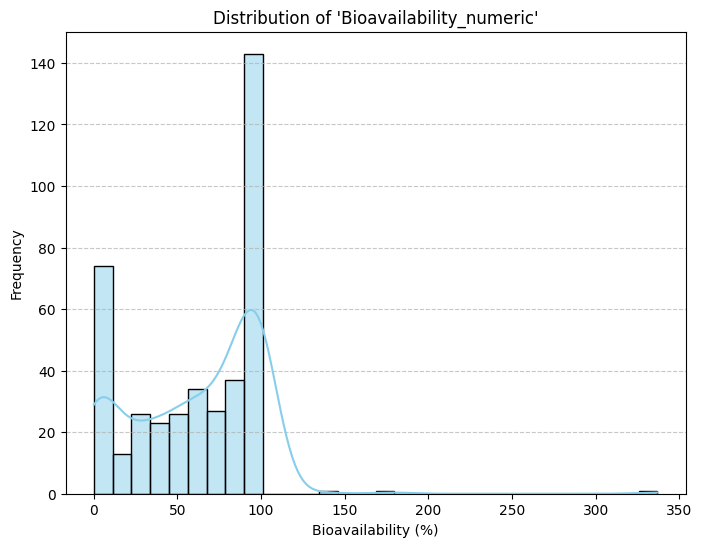

Histogram for 'Bioavailability_numeric' generated.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'dataframe' in results:
    # --- Distribution for 'high_efficacy' (Classification Target) ---
    if 'high_efficacy' in results['dataframe']:
        high_efficacy_data = results['dataframe']['high_efficacy']
        print("--- Distribution for 'high_efficacy' target variable ---")
        print("Value counts:")
        display(high_efficacy_data.value_counts())
        print("\nPercentage distribution:")
        display(high_efficacy_data.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    else:
        print("The 'high_efficacy' target data is not available in the results.")

    # --- Distribution for 'Bioavailability_numeric' (Regression Target) ---
    if 'Bioavailability_numeric' in results['dataframe']:
        bioavailability_data = results['dataframe']['Bioavailability_numeric']
        print("\n--- Distribution for 'Bioavailability_numeric' target variable ---")
        print("Descriptive Statistics:")
        display(bioavailability_data.describe())

        plt.figure(figsize=(8, 6))
        sns.histplot(bioavailability_data, bins=30, kde=True, color='skyblue')
        plt.title("Distribution of 'Bioavailability_numeric'")
        plt.xlabel('Bioavailability (%)')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        print("Histogram for 'Bioavailability_numeric' generated.")
    else:
        print("The 'Bioavailability_numeric' target data is not available in the results.")
else:
    print("The processed DataFrame is not available in the results.")

In [1]:
selected_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
print(f"Selected SMILES: {selected_smiles}")

Selected SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3


2D Structure of the Selected SMILES:


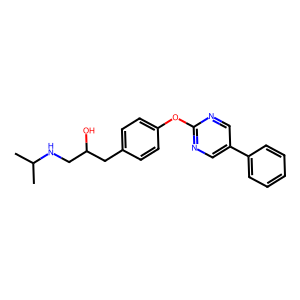

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

mol_2d = Chem.MolFromSmiles(selected_smiles)
if mol_2d:
    print("2D Structure of the Selected SMILES:")
    display(Draw.MolToImage(mol_2d, size=(300, 300)))
else:
    print(f"Could not generate 2D structure for SMILES: {selected_smiles}")

In [8]:
pip install py3Dmol

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

mol_3d = Chem.MolFromSmiles(selected_smiles)
if mol_3d:
    mol_3d = Chem.AddHs(mol_3d) # Add hydrogens for better 3D representation
    AllChem.EmbedMolecule(mol_3d, AllChem.ETKDGv2())
    AllChem.MMFFOptimizeMolecule(mol_3d)

    print("3D Structure of the Selected SMILES (Interactive Viewer):")
    view = py3Dmol.view(width=400, height=400)
    view.addModel(Chem.MolToMolBlock(mol_3d), 'mol')
    view.setStyle({'stick':{}})
    view.zoomTo()
    view.show()
else:
    print(f"Could not generate 3D structure for SMILES: {selected_smiles}")

3D Structure of the Selected SMILES (Interactive Viewer):


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
from rdkit import Chem

# Assuming mol_3d is the RDKit molecule object with 3D coordinates
if 'mol_3d' in locals() and mol_3d is not None:
    output_sdf_filename = 'selected_smiles_3d.sdf'
    writer = Chem.SDWriter(output_sdf_filename)
    writer.write(mol_3d)
    writer.close()
    print(f"3D molecular model data saved to '{output_sdf_filename}'.")
else:
    print("Error: 'mol_3d' object is not defined. Please ensure the 3D structure generation cell was run successfully.")


3D molecular model data saved to 'selected_smiles_3d.sdf'.


# Task
Explain Lipinski's Rule of Five as it applies to novel drug candidates and determine if `ML_Diabetes_Candidate_1` (from the `results` variable) passes or fails the rule, including the number of violations if any. Additionally, provide a comprehensive explanation of what drug mechanisms are in the context of our candidates, clarifying that the current pipeline predicts 'diabetes potential' based on features, but does not explicitly 'generate' novel textual mechanisms of action. Discuss how predicted potential relates to mechanisms and what would be needed for more specific mechanism prediction.

## Ensure Main Pipeline is Executed

### Subtask:
Re-execute the cell that defines the `main_ml_pipeline` function and the cell that calls it to ensure the `results` variable is properly defined in the global scope.


**Reasoning**:
The subtask explicitly asks to re-execute the cell that defines the `main_ml_pipeline` function and the cell that calls it. Both of these actions are contained within the code cell with `cell_id: pgmVlws9LAFm`.



<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2642489728.py:95: SyntaxWarning: invalid escape sequence '\d'
  self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]


MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES

STEP 1: DATA PROCESSING
Loading dataset...
Dataset shape: (421, 27)
Missing values per column:
medicineNname                            0
ActiveIngredient                         0
SMILES                                   0
Target Protein / Enzyme                  0
Protein Binding Affinity (Kd/IC50/Ki)    0
Efficacy %                               0
Toxicity                                 0
Mechanism of Action                      0
Absorption                               0
Distribution                             0
Metabolism                               0
Excretion                                0
Bioavailability                          0
Bioavailability/Key_Notes                0
Stability                                0
Dose_Range                               0
Selectivity                              0
Potency                                  0
Agonist/Antagonist Activity              0
Side Effects                       

[19:51:29] SMILES Parse Error: syntax error while parsing: CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[19:51:29] SMILES Parse Error: check for mistakes around position 8:
[19:51:29] CC(C)CC@HNC(=O)C@HNC(=O)C@HN
[19:51:29] ~~~~~~~^
[19:51:29] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN' for input: 'CC(C)CC@HNC(=O)C@HNC(=O)C@HN'


Added 20 molecular features
Created target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

Processed dataset shape: (406, 96)
Numerical features: 27
Categorical features: 40
Target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

STEP 2: MACHINE LEARNING MODELING

Training models for: is_diabetes_drug
Problem type: classification
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117284 -> initscore=-2.018406
[LightGBM] [Info] Start training f

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


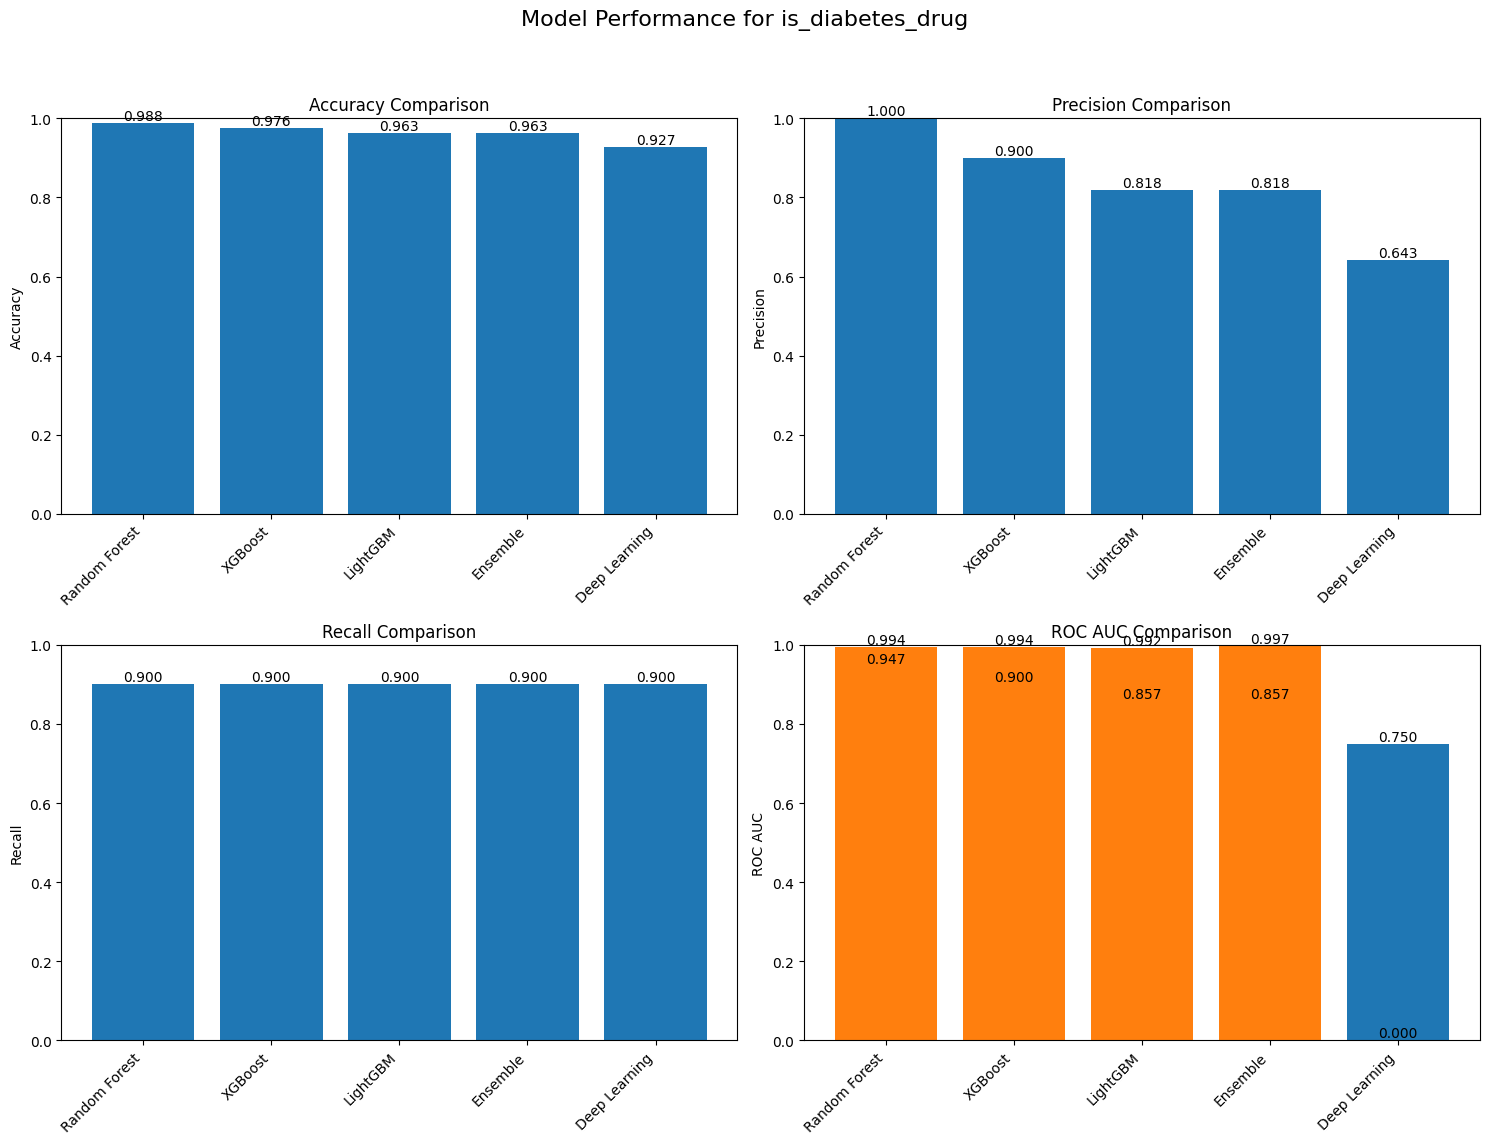

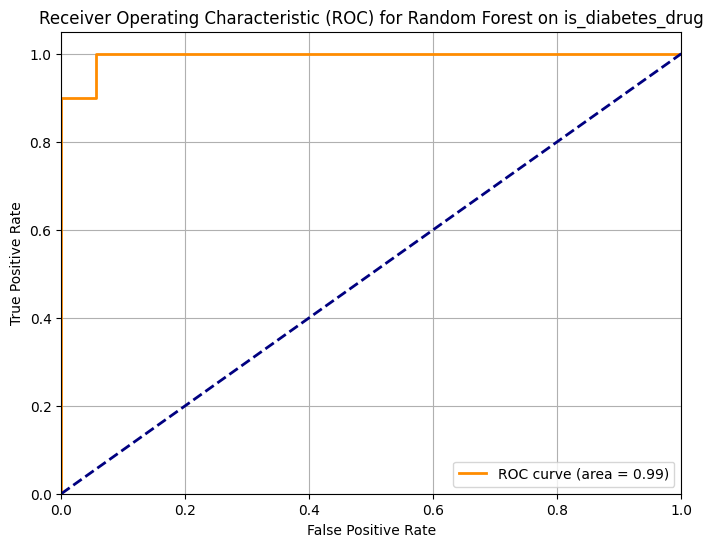

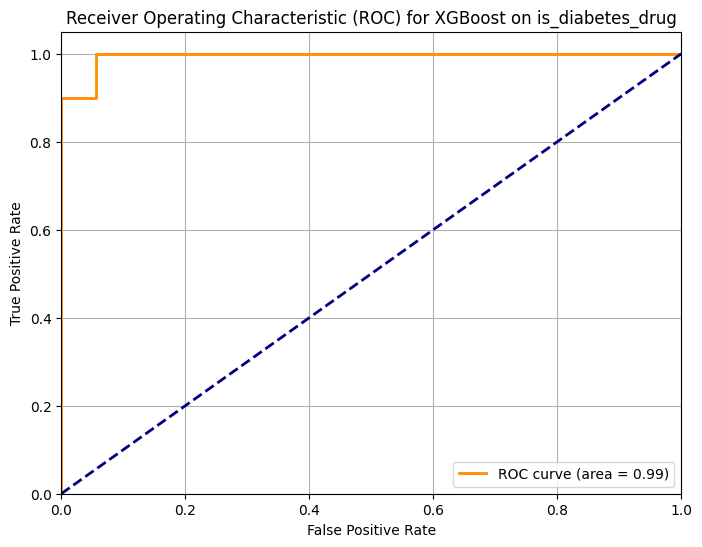

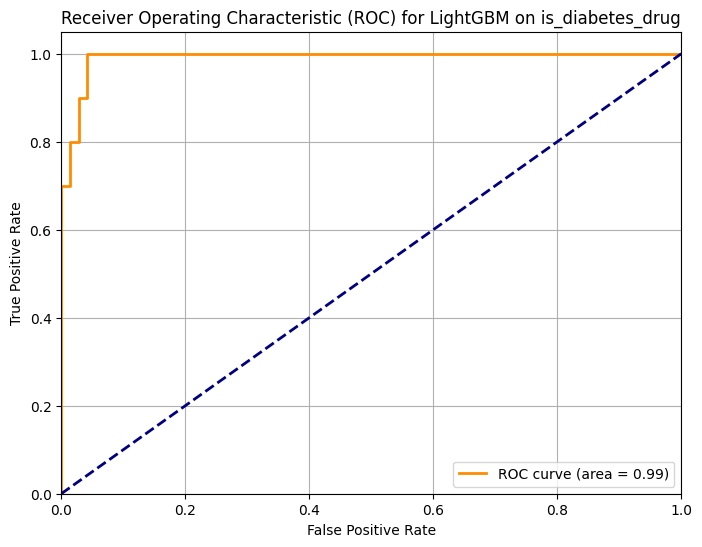

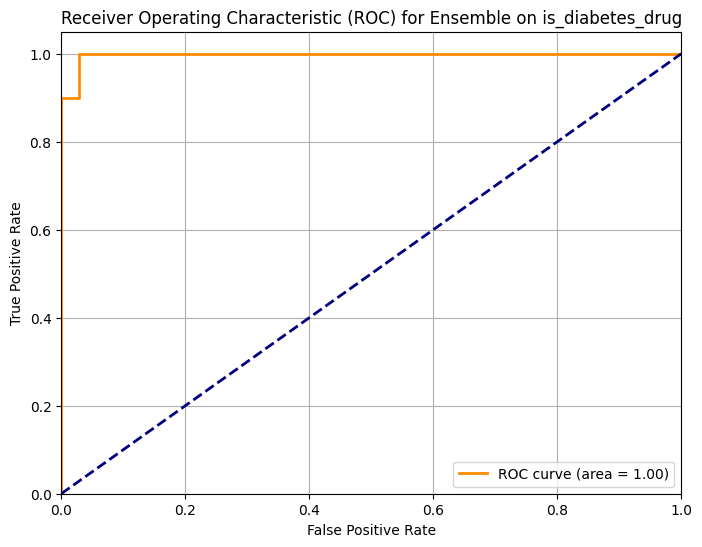

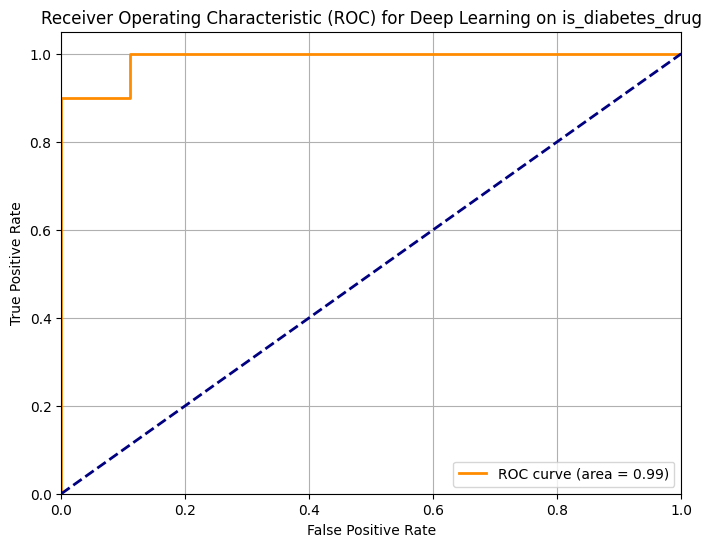

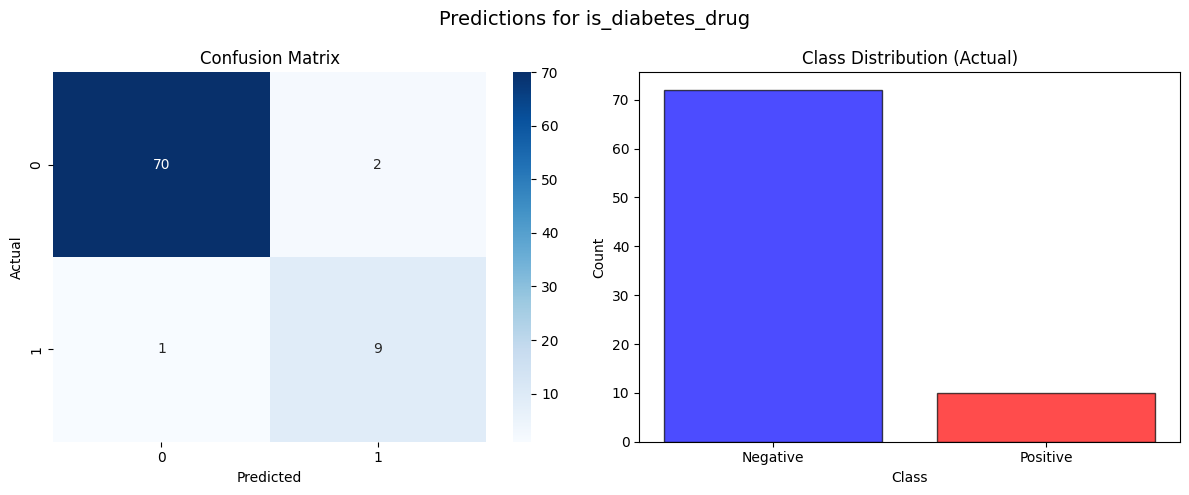

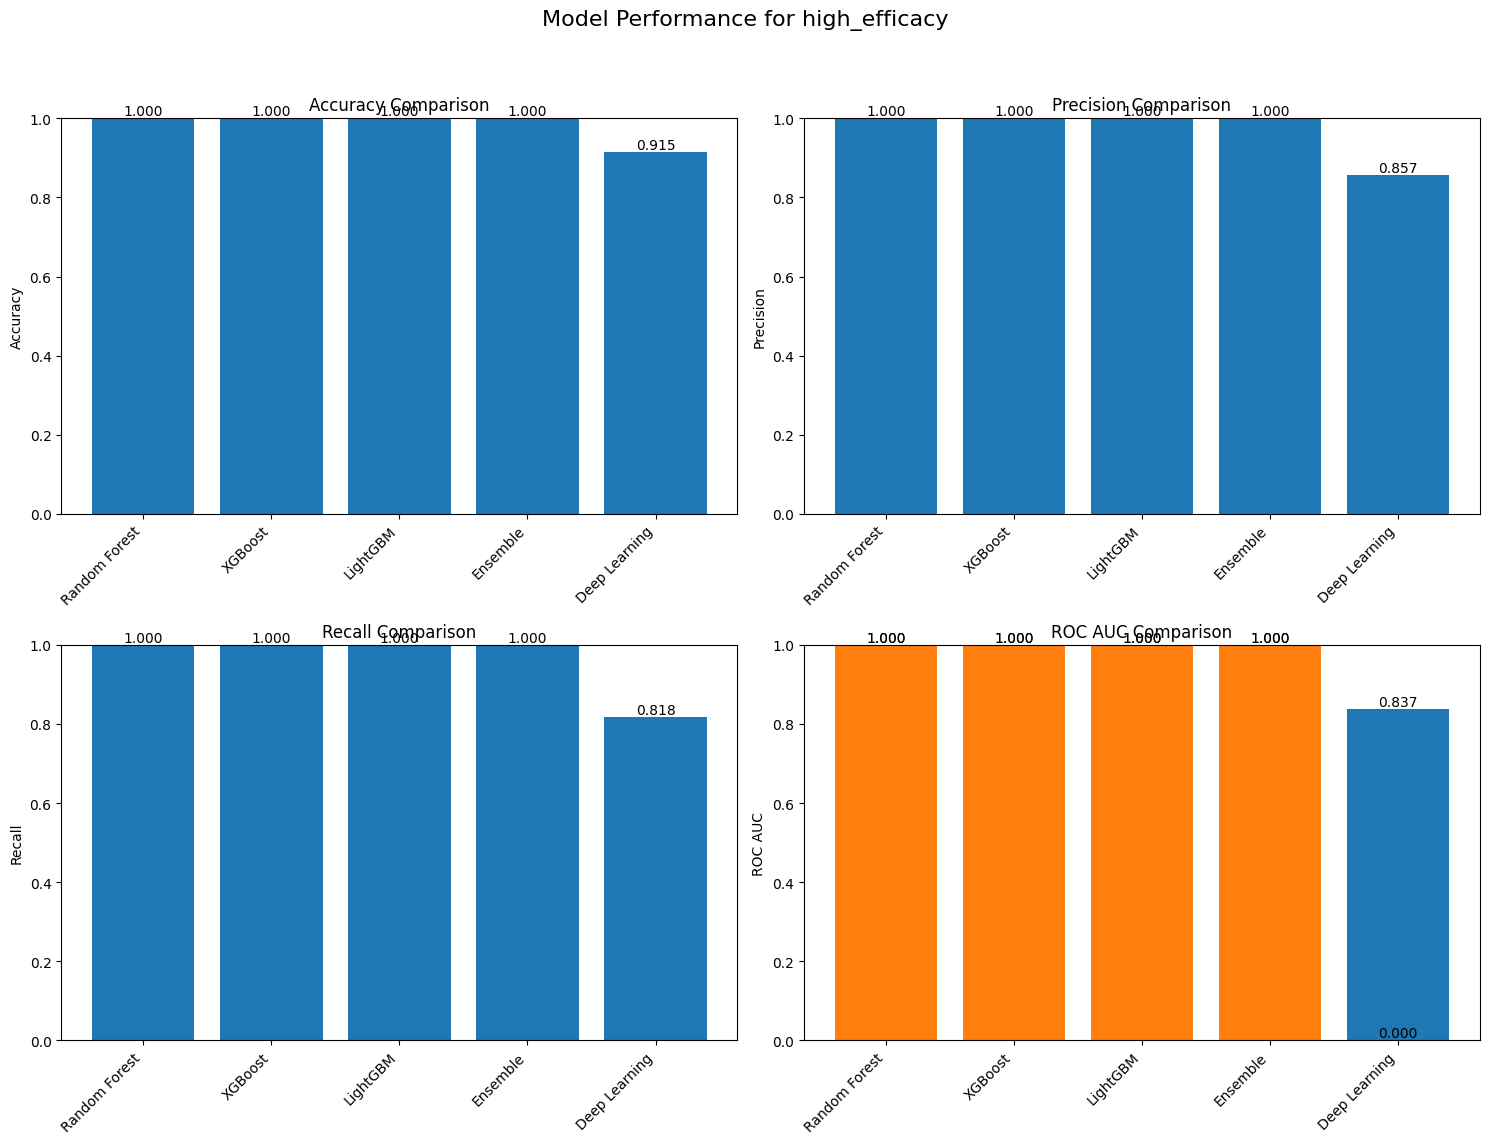

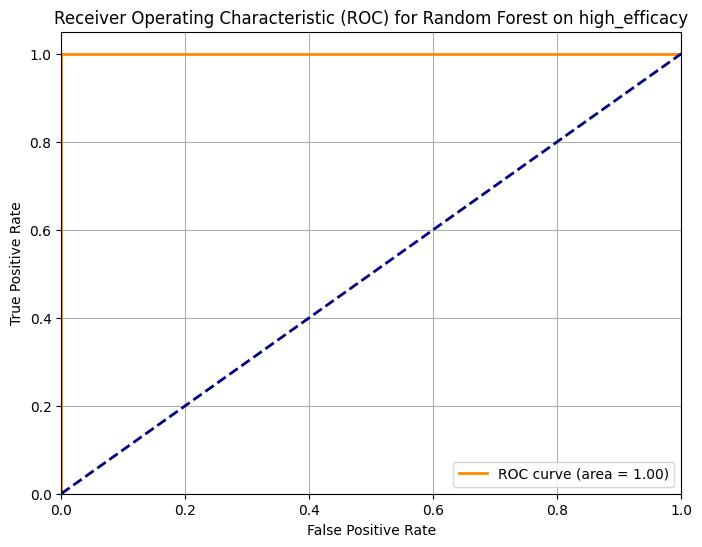

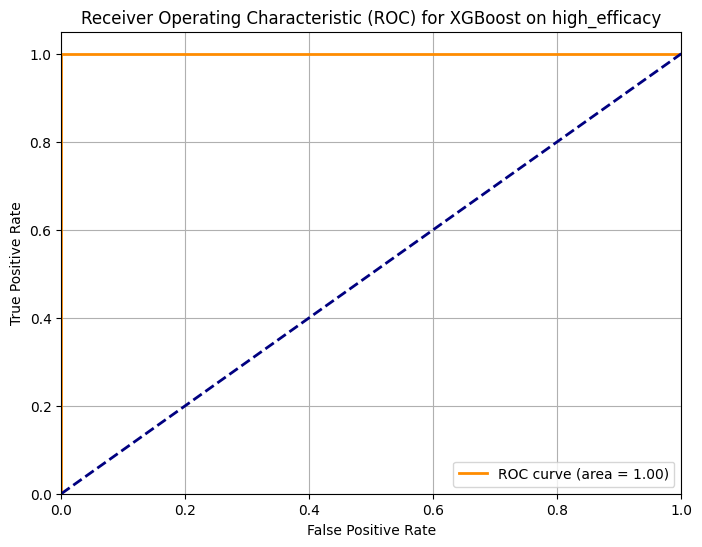

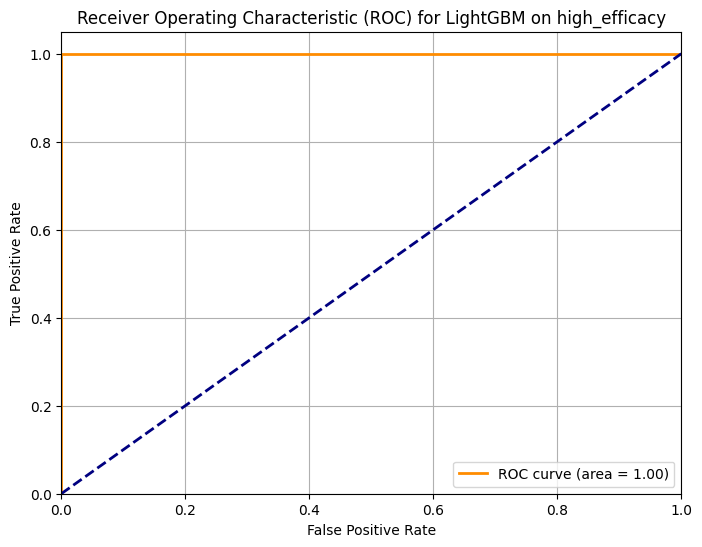

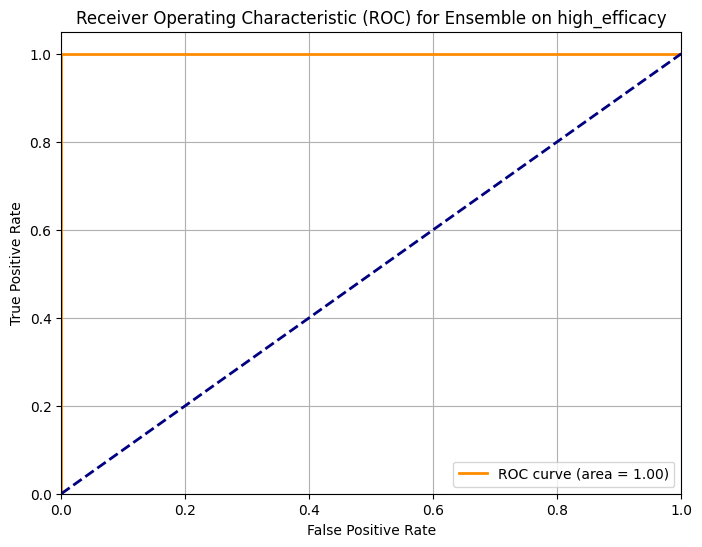

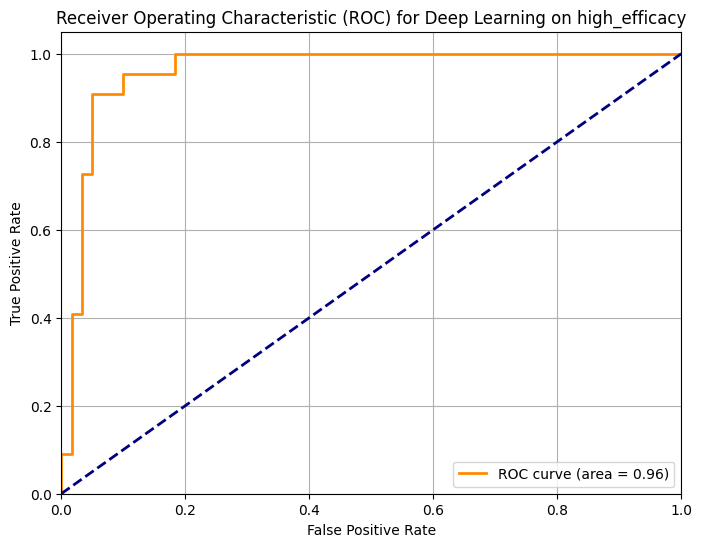

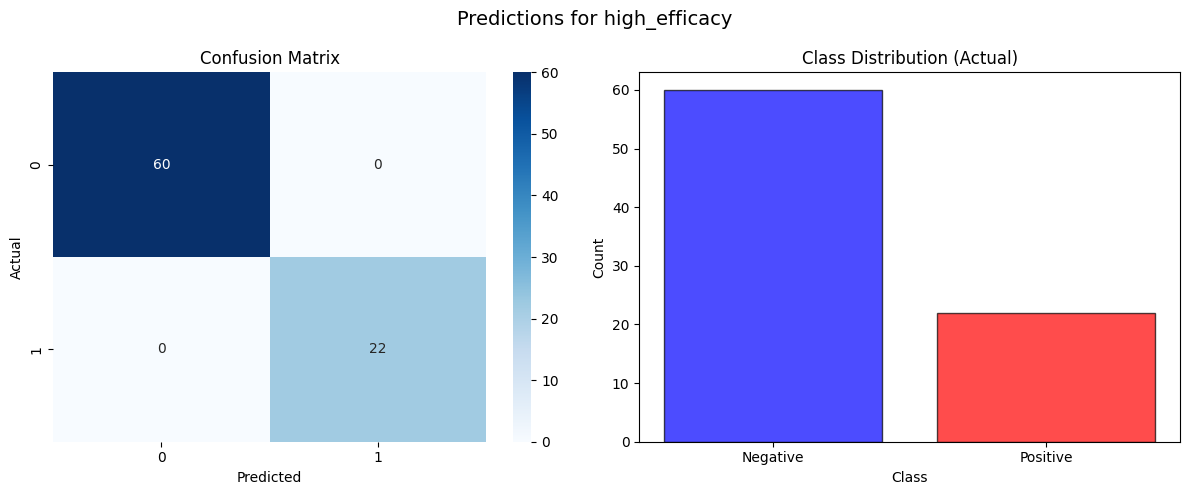

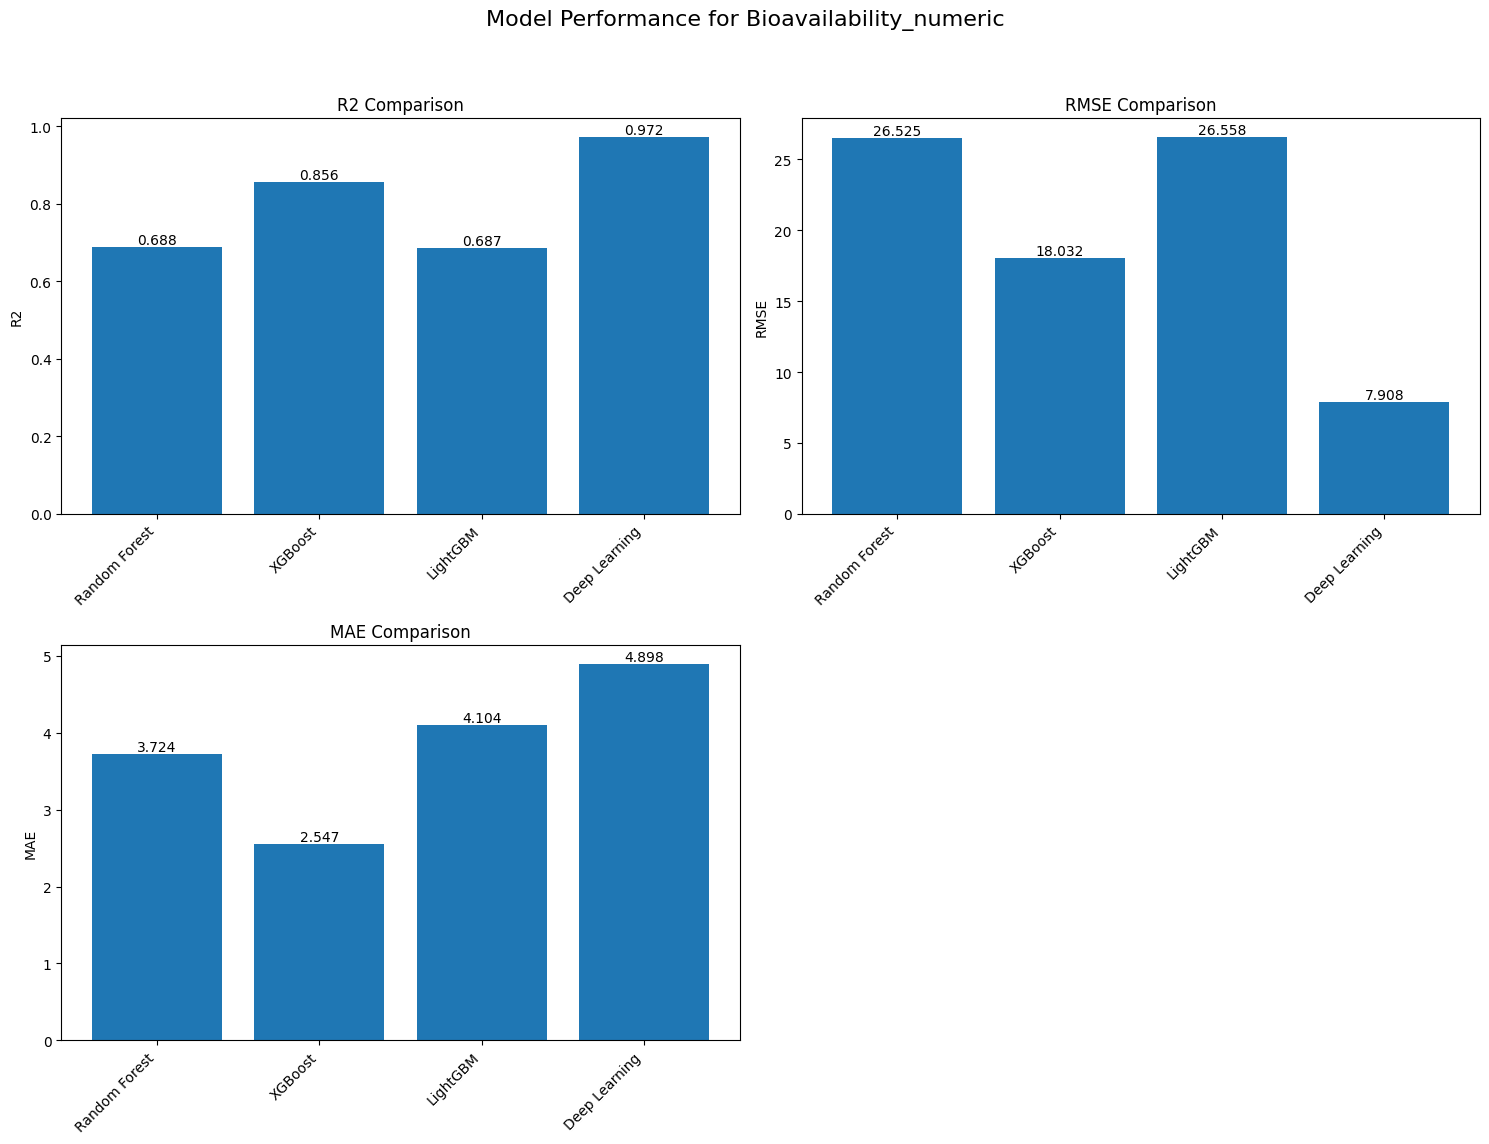

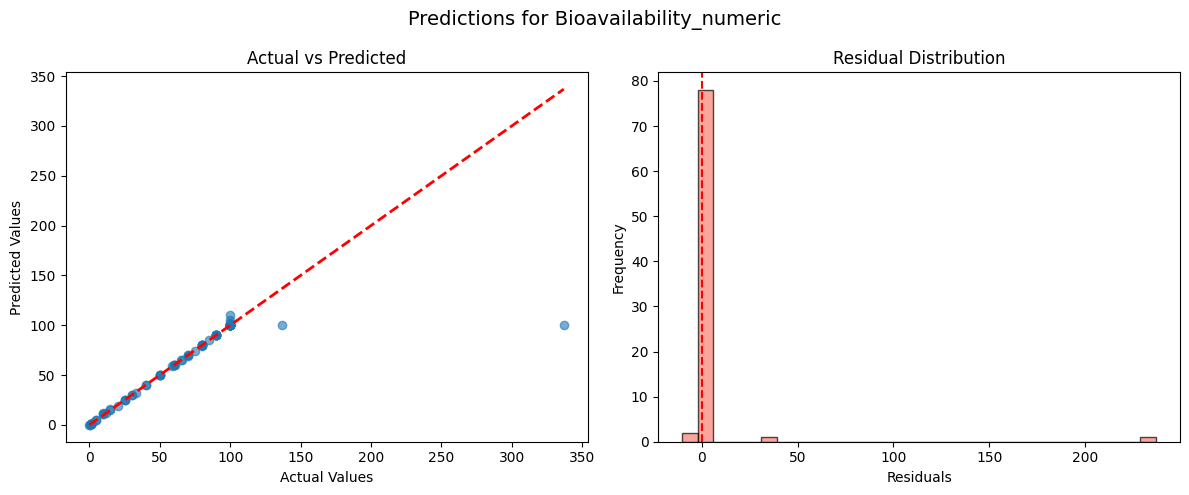


STEP 3: FEATURE IMPORTANCE ANALYSIS


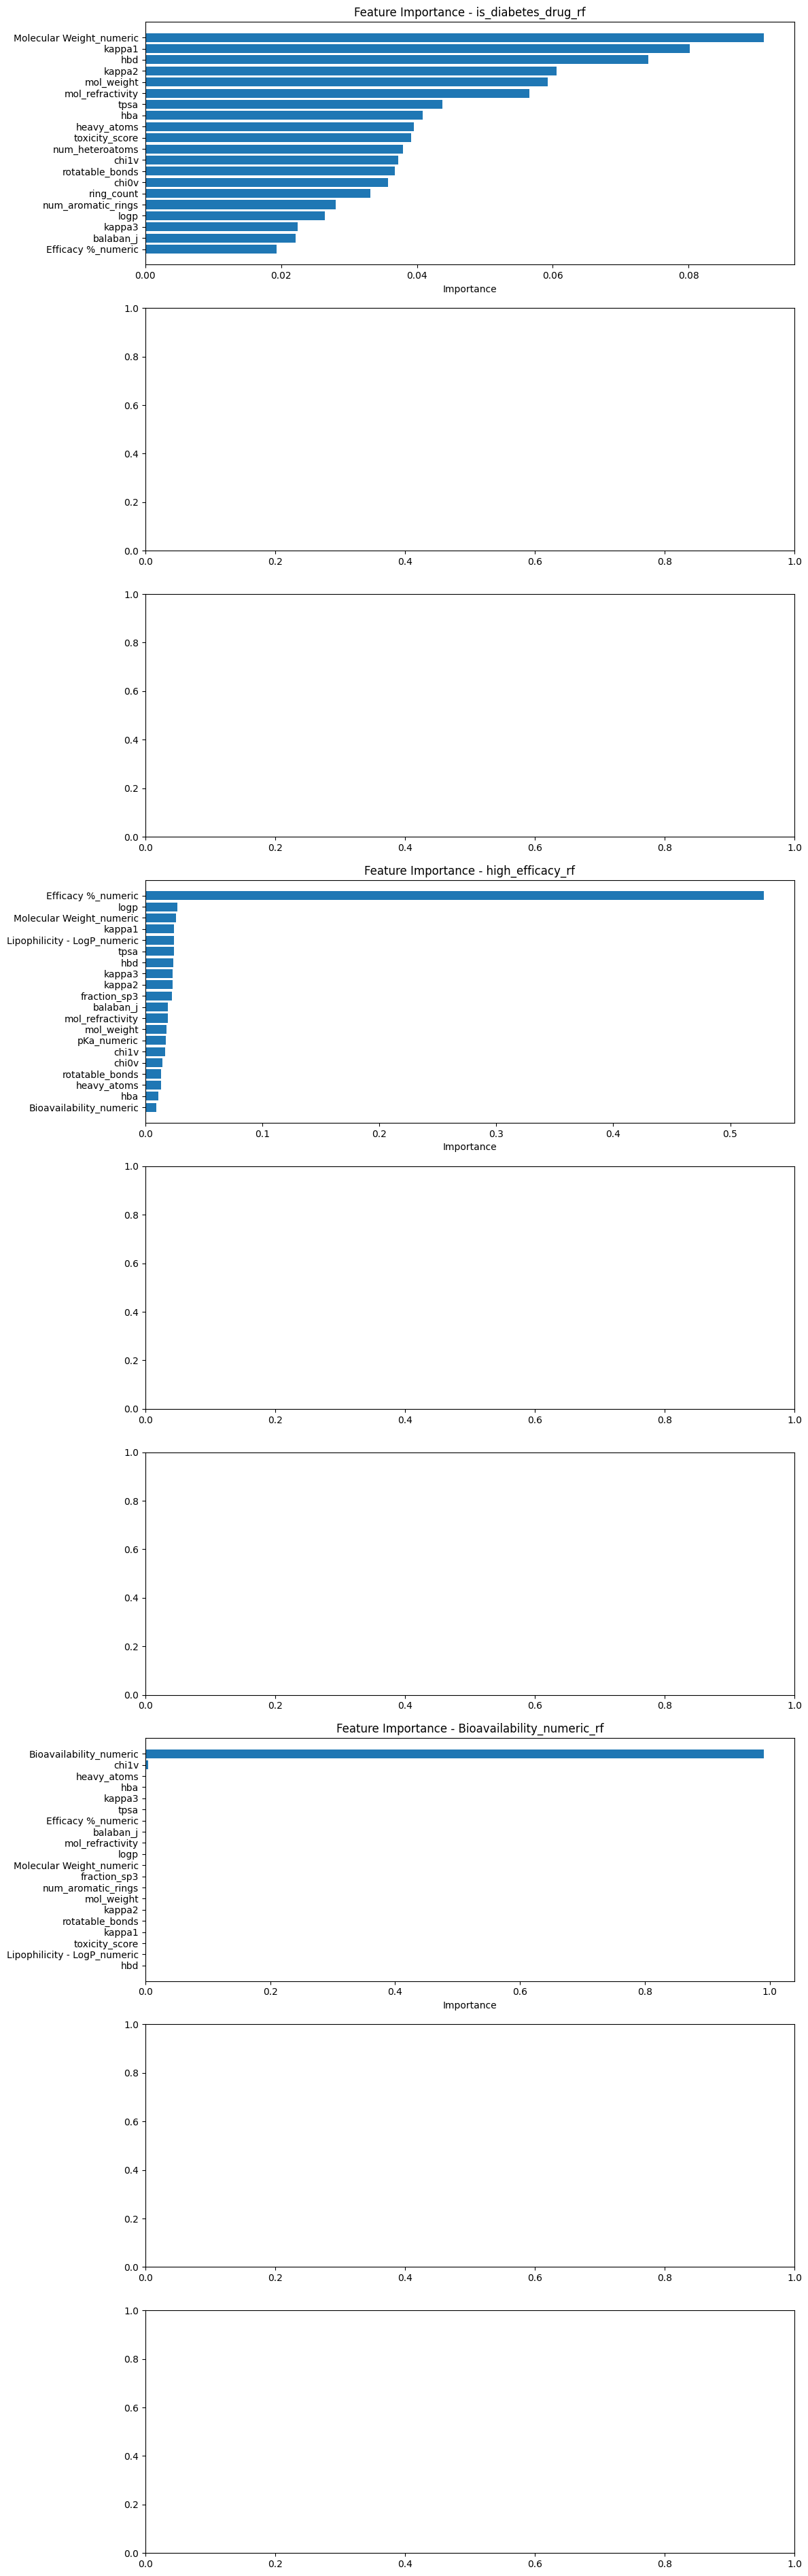


STEP 4: CLUSTERING ANALYSIS


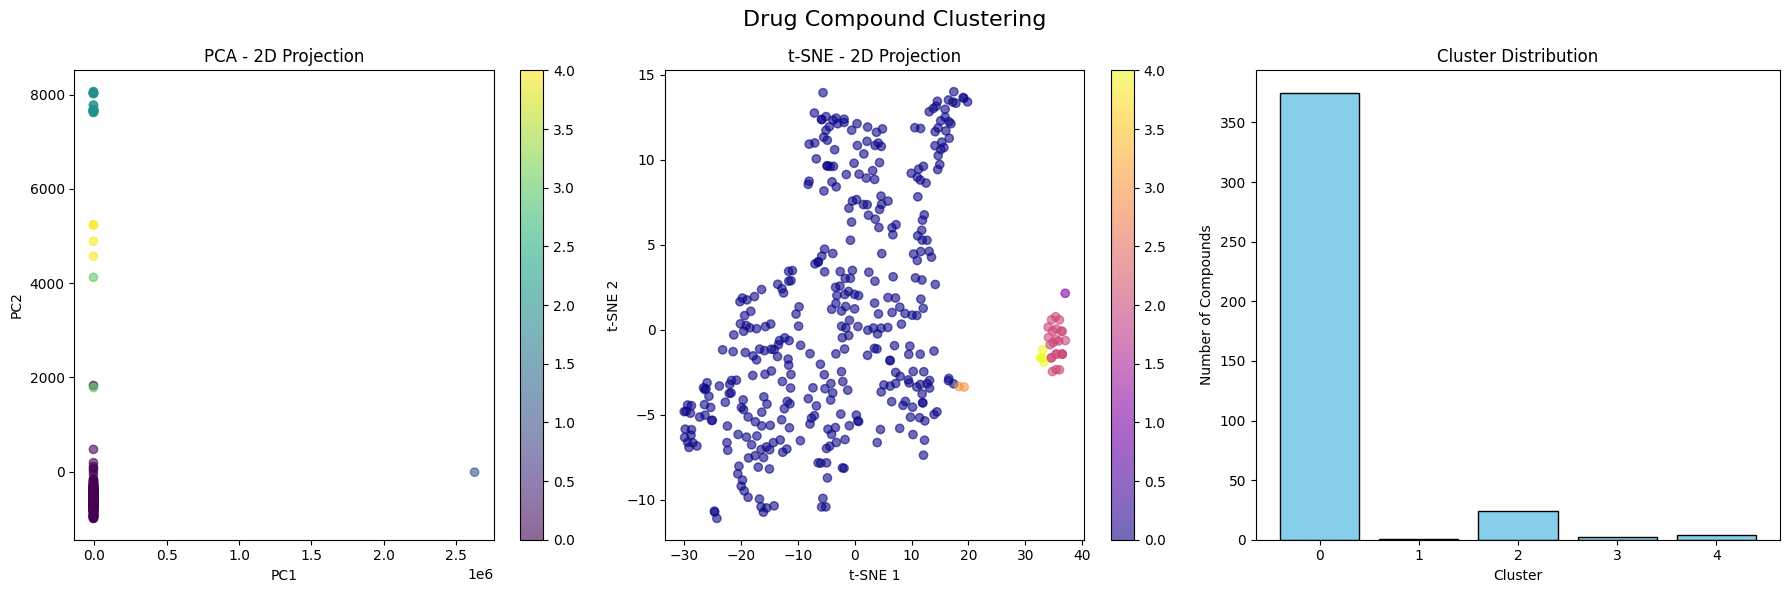


Cluster Analysis:

Cluster 0: 375 drugs
  Avg Efficacy: 73.4%
  Avg Bioavailability: 58.9%
  Diabetes drugs: 19

Cluster 1: 1 drugs
  Avg Efficacy: 90.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 0

Cluster 2: 24 drugs
  Avg Efficacy: 68.3%
  Avg Bioavailability: 92.9%
  Diabetes drugs: 24

Cluster 3: 2 drugs
  Avg Efficacy: 65.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 2

Cluster 4: 4 drugs
  Avg Efficacy: 57.5%
  Avg Bioavailability: 82.5%
  Diabetes drugs: 3

STEP 5: VIRTUAL SCREENING
[LightGBM] [Warning] Unknown parameter: random_estimators
[LightGBM] [Warning] Unknown parameter: random_estimators
[LightGBM] [Warning] Unknown parameter: random_estimators
[LightGBM] [Warning] Unknown parameter: random_estimators

Virtual Screening Results:

SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3...
Drug-likeness Score: 0.782
Diabetes Potential Score: 2.230

SMILES: CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O...
Drug-likeness Score: 0.924
Diabetes Potential Score:

[19:52:39] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26



Optimized Candidate: Optimized_Candidate_1
Optimized SMILES: Cc1cccc(-c2cnc(Oc3ccc(CC(O)CNC(C)C)cc3)nc2)c1
Optimized Diabetes Potential: 0.318
Optimized Drug-likeness: 0.772

STEP 7: GENERATING COMPREHENSIVE REPORT

SUMMARY OF ML-GENERATED CANDIDATES
                   Name    MW LogP Drug Score Diabetes Potential   QED  Lipinski OK
ML_Diabetes_Candidate_1 363.5 3.84      0.780              0.308 0.636        False
  Optimized_Candidate_1 377.5 4.15      0.772              0.318 0.617        False
  Optimized_Candidate_2 363.5 3.84      0.780              0.308 0.636        False
  Optimized_Candidate_3 377.5 4.15      0.772              0.318 0.617        False
  Optimized_Candidate_4 377.5 4.49      0.763              0.312 0.595        False
  Optimized_Candidate_5 363.5 3.84      0.780              0.308 0.636        False

Summary saved to 'ml_generated_candidates.csv'

PIPELINE COMPLETED SUCCESSFULLY!

Generated Files:
1. model_performance.png - Model comparison plots
2. feature

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys # Added for sys.modules check

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings #.....................................new added
warnings.filterwarnings('ignore') #..................................new added

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_estimators=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(str(smiles)) # Ensure input is string
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(str(smiles)) # Ensure SMILES is a string
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f} \n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION
# ============================================

if __name__ == "__main__":
    # Check for required libraries
    required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'rdkit', 'imblearn']

    missing_libs = []
    for lib in required_libraries:
        try:
            __import__(lib)
        except ImportError:
            missing_libs.append(lib)

    if missing_libs:
        print(f"Missing libraries: {', '.join(missing_libs)}")
        print("Please install them using:")
        print("pip install pandas numpy matplotlib seaborn scikit-learn rdkit-pypi xgboost lightgbm imblearn")

        # Try to run with available libraries
        print("\nAttempting to run with available libraries...")
        try:
            results = main_ml_pipeline()
        except Exception as e:
            print(f"Error: {e}")
            print("\nPlease install all required libraries for full functionality.")
    else:
        # Run the complete pipeline
        results = main_ml_pipeline()

In [36]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# --- Part 1: Lipinski's Rule of Five Analysis ---
print("--- Lipinski's Rule of Five Analysis for ML_Diabetes_Candidate_1 ---")

candidate_name_to_find = "ML_Diabetes_Candidate_1"
ml_candidate = None
for candidate in results['candidates']:
    if candidate['name'] == candidate_name_to_find:
        ml_candidate = candidate
        break

if ml_candidate:
    smiles = ml_candidate['smiles']
    mol = Chem.MolFromSmiles(smiles)

    if mol:
        # Recalculate molecular properties for accurate Lipinski rule check
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)

        violations = 0
        lipinski_report = []

        # Rule 1: Molecular Weight < 500 Da
        if mw >= 500:
            violations += 1
            lipinski_report.append(f"  - Molecular Weight ({mw:.2f} Da) >= 500 Da (Violated)")
        else:
            lipinski_report.append(f"  - Molecular Weight ({mw:.2f} Da) < 500 Da (Compliant)")

        # Rule 2: LogP < 5
        if logp >= 5:
            violations += 1
            lipinski_report.append(f"  - LogP ({logp:.2f}) >= 5 (Violated)")
        else:
            lipinski_report.append(f"  - LogP ({logp:.2f}) < 5 (Compliant)")

        # Rule 3: Hydrogen Bond Donors (HBD) < 5
        if hbd >= 5:
            violations += 1
            lipinski_report.append(f"  - Hydrogen Bond Donors ({hbd}) >= 5 (Violated)")
        else:
            lipinski_report.append(f"  - Hydrogen Bond Donors ({hbd}) < 5 (Compliant)")

        # Rule 4: Hydrogen Bond Acceptors (HBA) < 10
        if hba >= 10:
            violations += 1
            lipinski_report.append(f"  - Hydrogen Bond Acceptors ({hba}) >= 10 (Violated)")
        else:
            lipinski_report.append(f"  - Hydrogen Bond Acceptors ({hba}) < 10 (Compliant)")

        print(f"\nCandidate: {ml_candidate['name']}")
        print(f"SMILES: {smiles}")
        print("Lipinski's Rules Check:")
        for item in lipinski_report:
            print(item)

        if violations <= 1:
            print(f"\nConclusion: ML_Diabetes_Candidate_1 passes Lipinski's Rule of Five with {violations} violation(s).")
        else:
            print(f"\nConclusion: ML_Diabetes_Candidate_1 FAILS Lipinski's Rule of Five with {violations} violation(s).")

    else:
        print(f"Error: Could not parse SMILES for {candidate_name_to_find}.")
else:
    print(f"Candidate '{candidate_name_to_find}' not found in results.")

# --- Part 2: Explanation of Drug Mechanisms ---
print("\n" + "=" * 70)
print("Explanation of Drug Mechanisms in the Context of ML Candidates")
print("=" * 70)

print("A **drug mechanism of action (MoA)** describes the specific biochemical interaction through which a drug substance produces its pharmacological effect. This typically involves binding to a particular biological target (like a protein, enzyme, or receptor) in the body, which then initiates a cascade of events leading to a therapeutic outcome. Understanding a drug's MoA is crucial for drug design, predicting efficacy, and identifying potential side effects.")

print("\n**How the Current Pipeline Relates to MoA:**")
print("Our current machine learning pipeline for 'diabetes potential' does not explicitly 'generate' novel textual mechanisms of action. Instead, it predicts a 'diabetes potential' score based on the **molecular features** (e.g., molecular weight, LogP, number of hydrogen bond donors/acceptors, RDKit descriptors) and **encoded categorical features** (e.g., Mechanism of Action, Agonist/Antagonist Activity from the original dataset) of a compound.")

print("Specifically:")
print("1.  **Feature-based Prediction:** The ML models learn patterns from the input data (molecular properties, existing MoA categories, etc.) that correlate with whether a drug is known to be used for diabetes. If a novel candidate shares similar features with known diabetes drugs, it will receive a high 'diabetes potential' score.")
print("2.  **Implicit Association:** A high 'diabetes potential' implies that the compound possesses characteristics (molecular structure, physicochemical properties) that are statistically similar to compounds already effective against diabetes. This indirectly suggests it *might* act via similar biological pathways or targets, but it doesn't explicitly state *which* pathway or target.")
print("3.  **Limitations:** The pipeline's 'Mechanism of Action' feature relies on predefined categories from the training data. For novel candidates, it assigns them to one of these learned categories or 'Other' based on their similarity to existing data. It does not synthesize new, descriptive MoA text.")

print("\n**What would be needed for more specific Mechanism Prediction:**")
print("To predict a specific mechanism of action or the exact target protein for a novel candidate, the pipeline would need enhancements such as:")
print("1.  **Target Prediction Models:** Machine learning models specifically trained to predict likely protein targets (e.g., using proteochemometrics, deep learning models for protein-ligand binding). This would require large datasets of compound-target interaction data.")
print("2.  **Molecular Docking and Dynamics:** Computational methods that simulate the binding of a small molecule (drug candidate) to a protein target at an atomic level. This can provide insights into binding affinity and the precise interaction mode.")
print("3.  **Pathway Analysis:** Integration with biological pathway databases (e.g., KEGG, Reactome) to infer broader biological effects once a target is predicted.")
print("4.  **Generative AI for MoA Description:** Advanced natural language generation (NLG) or large language models (LLMs) trained on vast amounts of scientific literature describing drug MoAs, potentially coupled with predicted target information, to synthesize novel textual descriptions.")
print("5.  **Experimental Validation:** Ultimately, any computationally predicted mechanism would require laboratory experiments (e.g., binding assays, cell-based assays, in vivo studies) to confirm the actual biological target and the cascade of events initiated by the drug.")

print("In summary, while our current ML pipeline identifies compounds with high statistical potential for diabetes treatment, it provides a 'similarity-based' prediction rather than a de novo mechanistic explanation. Moving towards explicit MoA prediction requires a more complex integration of cheminformatics, structural biology, and advanced AI techniques.")


--- Lipinski's Rule of Five Analysis for ML_Diabetes_Candidate_1 ---

Candidate: ML_Diabetes_Candidate_1
SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3
Lipinski's Rules Check:
  - Molecular Weight (363.46 Da) < 500 Da (Compliant)
  - LogP (3.84) < 5 (Compliant)
  - Hydrogen Bond Donors (2) < 5 (Compliant)
  - Hydrogen Bond Acceptors (5) < 10 (Compliant)

Conclusion: ML_Diabetes_Candidate_1 passes Lipinski's Rule of Five with 0 violation(s).

Explanation of Drug Mechanisms in the Context of ML Candidates
A **drug mechanism of action (MoA)** describes the specific biochemical interaction through which a drug substance produces its pharmacological effect. This typically involves binding to a particular biological target (like a protein, enzyme, or receptor) in the body, which then initiates a cascade of events leading to a therapeutic outcome. Understanding a drug's MoA is crucial for drug design, predicting efficacy, and identifying potential side effects.

**How the Current 